In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib import rcParams

In [2]:
data = {
    "Student ID": [f"S{str(i).zfill(2)}" for i in range(1, 11)],
    "Midterm 1": [78, 82, 77, 75, 67, 71, 64, 92, 80, 89],
    "Midterm 2": [82, 85, 90, 77, 77, 64, 33, 88, 39, 64],
    "Final (out of 200)": [182, 180, 188, 149, 157, 175, 110, 184, 126, 116],
}

# Creating a DataFrame
grades = pd.DataFrame(data)

In [3]:
# identify the top 3 student with the highest final exam score

top_3_students = grades.nlargest(3, "Final (out of 200)")
topo_3_students_midterm1 = grades.nlargest(3, "Midterm 1")
topo_3_students_midterm2 = grades.nlargest(3, "Midterm 2")

In [4]:
topo_3_students_midterm2

,Student ID,Midterm 1,Midterm 2,Final (out of 200)
2,S03,77,90,188
7,S08,92,88,184
1,S02,82,85,180


In [5]:
# Importing data from Data folder

# Loop through all the folders in the Data folder, for each folder loop through all the files in the folder

students = os.listdir("Data")
student_data = {}

for student_id in students:
    if student_id == ".DS_Store":
        continue

    student_path = os.path.join("Data", student_id)
    assessment_types = os.listdir(student_path)

    student_data[student_id] = {}
    student_info = student_data[student_id]

    # Read in the data for each assessment type of the student
    for assessment_type in assessment_types:
        if assessment_type == ".DS_Store":
            continue

        assessment_path = os.path.join(student_path, assessment_type)

        student_info[assessment_type] = {}
        assessment_data = student_info[assessment_type]

        assessment_files = os.listdir(assessment_path)

        for file_name in assessment_files:
            if file_name.endswith(".csv") and file_name != "tags.csv":
                file_path = os.path.join(assessment_path, file_name)
                # Read in the file as a pandas dataframe, ignoring the first row
                df = pd.read_csv(file_path, skiprows=1, header=None)

                assessment_data[file_name] = df

In [6]:
student_data['S1']['Midterm 1'].keys()

dict_keys(['TEMP.csv', 'HR.csv', 'ACC.csv', 'IBI.csv', 'EDA.csv', 'BVP.csv'])

In [7]:
def plot_eda_data(df, title):
    """Plot the fluctuation of EDA data over time. Since no time column is provided,
    we assume the data points are recorded in chronological order.

    Args:
        df (pandas.DataFrame): The dataframe containing the EDA data.
        title (str): The title of the plot.

    Returns:
        None
    """
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df.iloc[:, 0], label="EDA Signal", color="blue")
    plt.title(title)
    plt.xlabel("Time (sample index)")  # Using row index as time
    plt.ylabel("EDA (microSiemens)")
    plt.grid(True)
    plt.legend()
    plt.show()


# testing
# plot_eda_data(student_data['S1']['Midterm 1']['EDA.csv'], 'Midterm 1 EDA Data for Student S01')

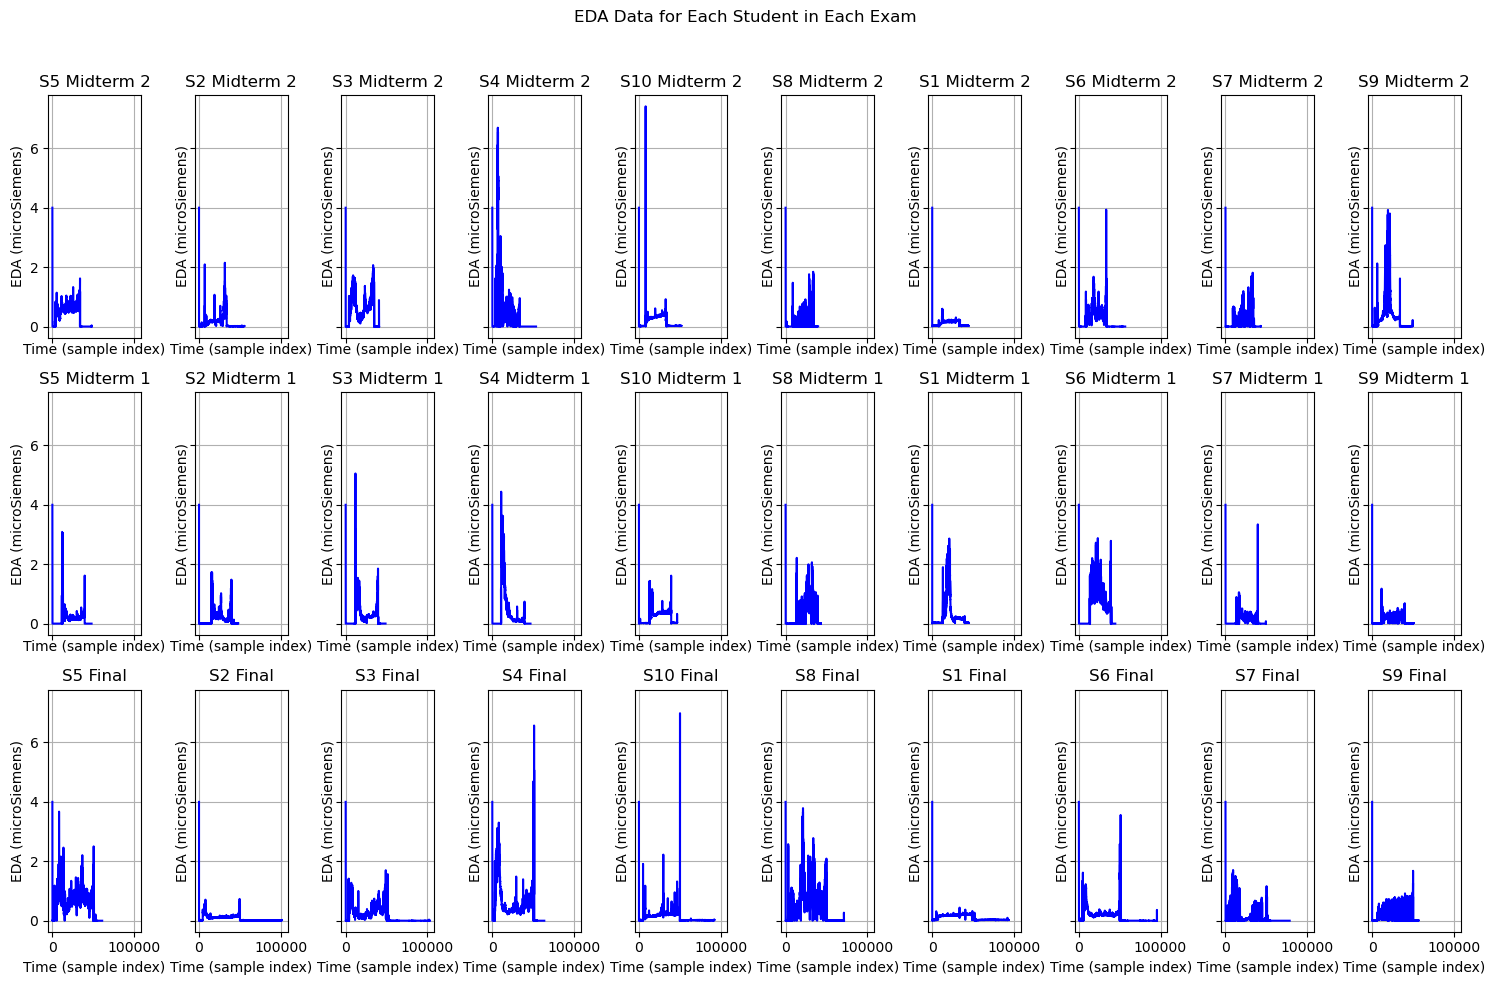

In [8]:
# find the plot the fluctuation of EDA data for each student in each exam (midterm 1, midterm 2, and final)
# making plot into subplots where each student is a subplot and each exam is a row

num_students = len(student_data)
num_assessments = len(next(iter(student_data.values())))

fig, axes = plt.subplots(
    num_assessments, num_students, figsize=(15, 10), sharex=True, sharey=True
)
fig.suptitle("EDA Data for Each Student in Each Exam")

for col, (student_id, student_info) in enumerate(student_data.items()):
    for row, (assessment_type, assessment_data) in enumerate(student_info.items()):
        ax = axes[row, col]
        ax.plot(
            assessment_data["EDA.csv"].index,
            assessment_data["EDA.csv"].iloc[:, 0],
            label="EDA Signal",
            color="blue",
        )
        ax.set_title(f"{student_id} {assessment_type}")
        ax.set_xlabel("Time (sample index)")
        ax.set_ylabel("EDA (microSiemens)")
        ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [9]:
student_data

{'S5': {'Midterm 2': {'TEMP.csv':            0
   0       4.00
   1      22.17
   2      22.17
   3      22.17
   4      22.17
   ...      ...
   48060  22.73
   48061  22.69
   48062  22.69
   48063  22.69
   48064  22.69
   
   [48065 rows x 1 columns],
   'HR.csv':            0
   0       1.00
   1      82.00
   2      85.50
   3      87.33
   4      86.25
   ...      ...
   12003  88.43
   12004  87.48
   12005  86.48
   12006  85.67
   12007  85.10
   
   [12008 rows x 1 columns],
   'ACC.csv':            0     1     2
   0       32.0  32.0  32.0
   1       -1.0 -63.0   5.0
   2       -1.0 -63.0   5.0
   3       -1.0 -63.0   5.0
   4       -1.0 -63.0   5.0
   ...      ...   ...   ...
   384518   5.0 -42.0  43.0
   384519   4.0 -38.0  47.0
   384520   1.0 -43.0  44.0
   384521   3.0 -48.0  48.0
   384522   9.0 -49.0  39.0
   
   [384523 rows x 3 columns],
   'IBI.csv':                 0         1
   0       61.252804  0.468771
   1       61.799704  0.546900
   2       68.190621  0.

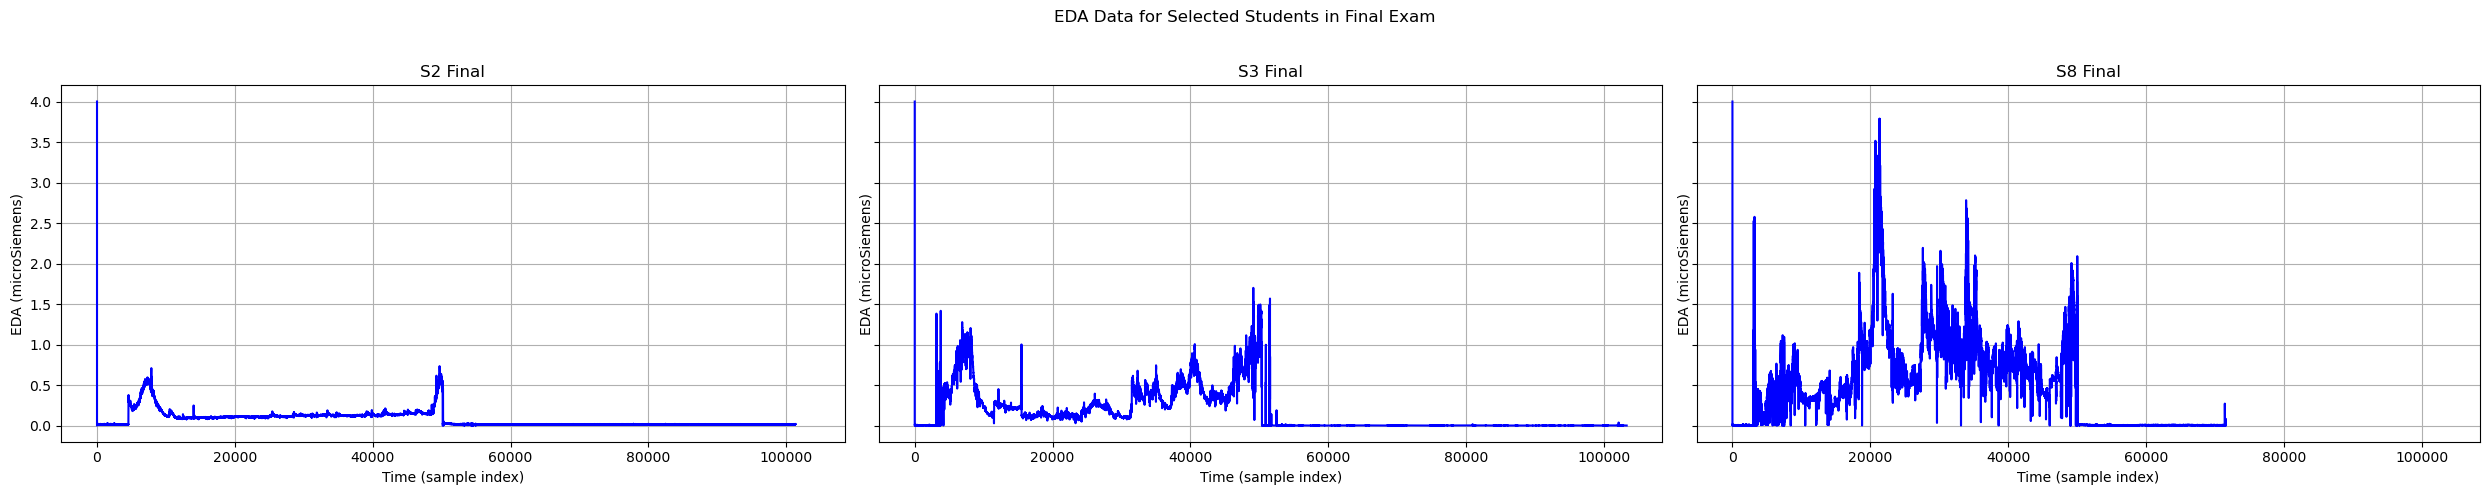

In [10]:
# Visualize EDA data of S1, S3, and S8 for the final exam

selected_students = ['S2', 'S3', 'S8']
num_students = len(selected_students)

fig, axes = plt.subplots(1, num_students, figsize=(25, 5), sharex=True, sharey=True)
fig.suptitle('EDA Data for Selected Students in Final Exam')

for col, student_id in enumerate(selected_students):
    student_info = student_data[student_id]
    assessment_data = student_info['Final']
    ax = axes[col]
    ax.plot(assessment_data['EDA.csv'].index, assessment_data['EDA.csv'].iloc[:, 0], label="EDA Signal", color="blue")
    ax.set_title(f"{student_id} Final")
    ax.set_xlabel("Time (sample index)")
    ax.set_ylabel("EDA (microSiemens)")
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


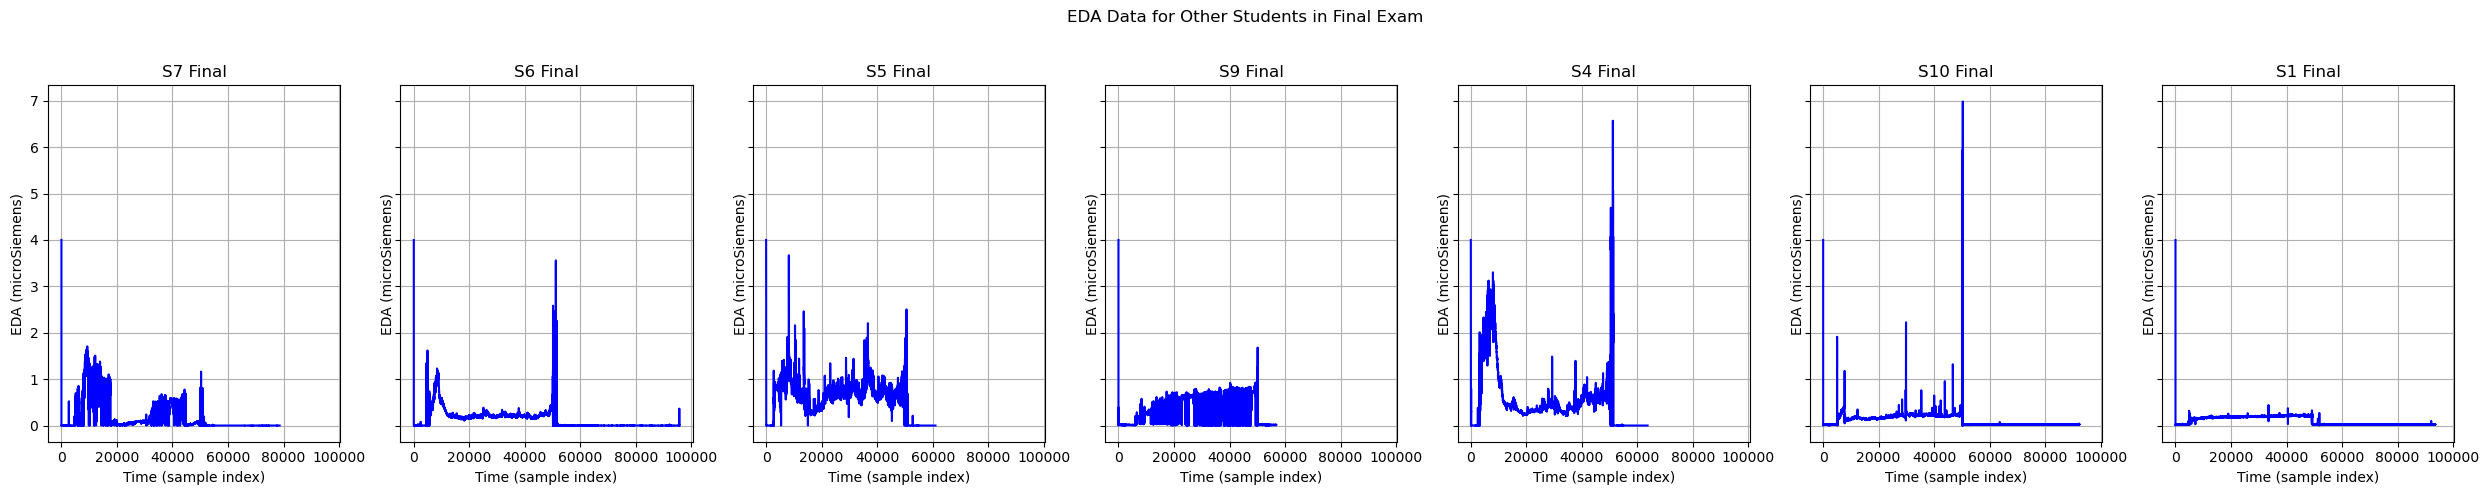

In [11]:
# Visualize EDA data of other students in the final exam

all_students = set(student_data.keys())
selected_students = {'S2', 'S3', 'S8'}
other_students = list(all_students - selected_students)
num_students = len(other_students)

fig, axes = plt.subplots(1, num_students, figsize=(25, 5), sharex=True, sharey=True)
fig.suptitle('EDA Data for Other Students in Final Exam')

for col, student_id in enumerate(other_students):
    student_info = student_data[student_id]
    assessment_data = student_info['Final']
    ax = axes[col]
    ax.plot(assessment_data['EDA.csv'].index, assessment_data['EDA.csv'].iloc[:, 0], label="EDA Signal", color="blue")
    ax.set_title(f"{student_id} Final")
    ax.set_xlabel("Time (sample index)")
    ax.set_ylabel("EDA (microSiemens)")
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [12]:
grades.nlargest(10, "Final (out of 200)")

,Student ID,Midterm 1,Midterm 2,Final (out of 200)
2,S03,77,90,188
7,S08,92,88,184
0,S01,78,82,182
1,S02,82,85,180
5,S06,71,64,175
4,S05,67,77,157
3,S04,75,77,149
8,S09,80,39,126
9,S10,89,64,116
6,S07,64,33,110


In [13]:
# HR

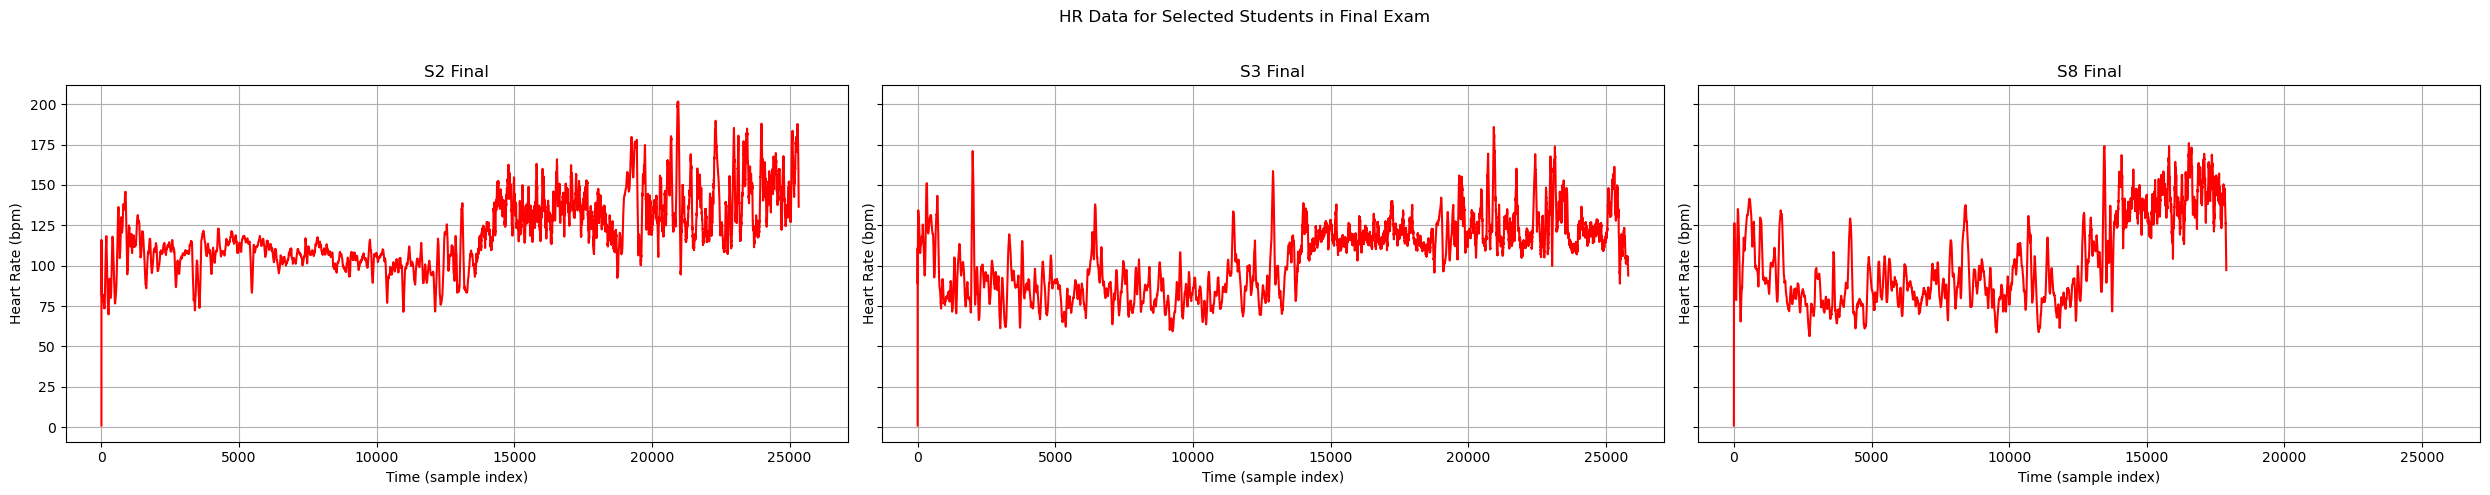

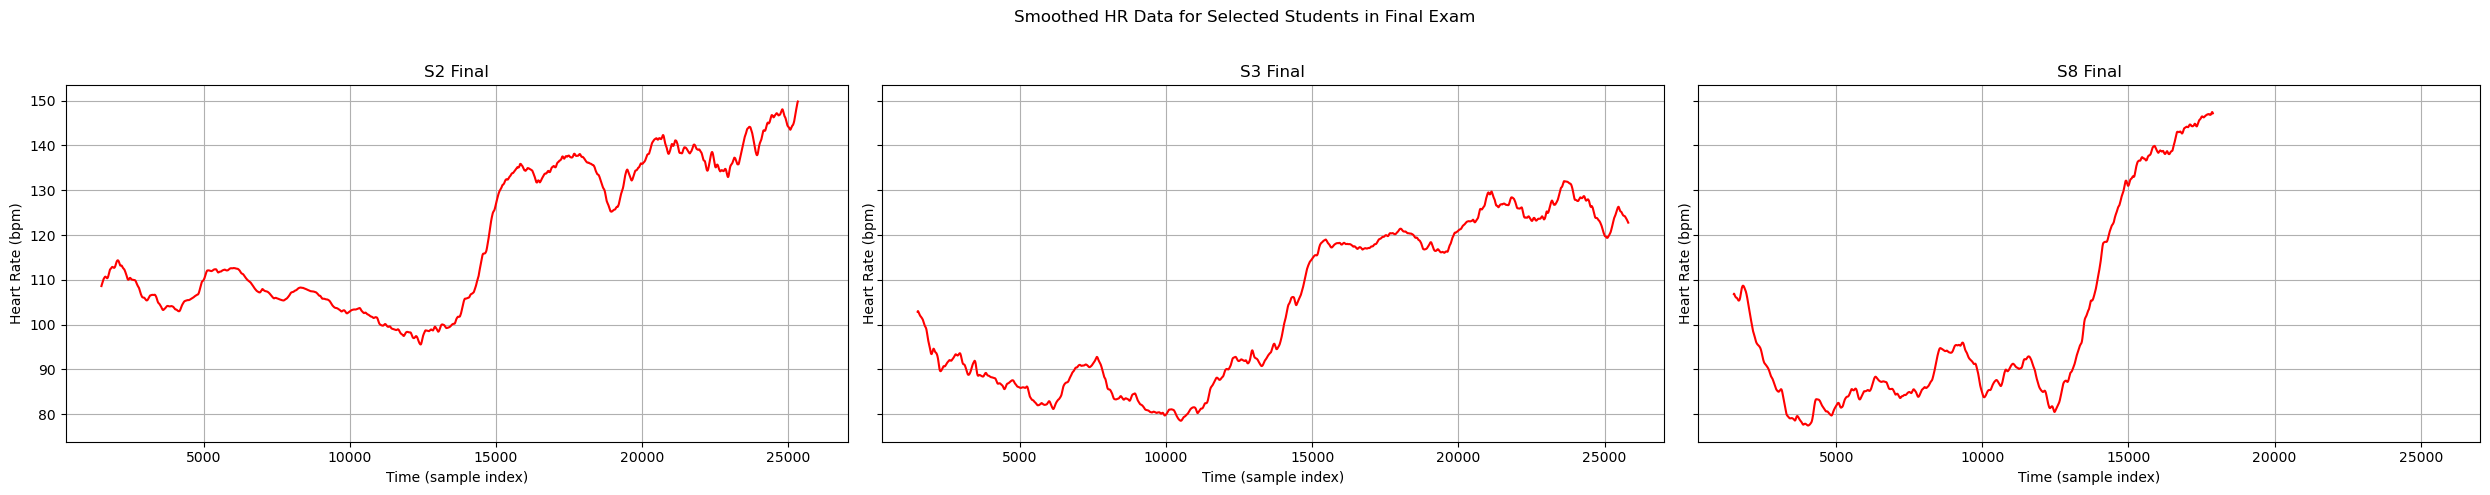

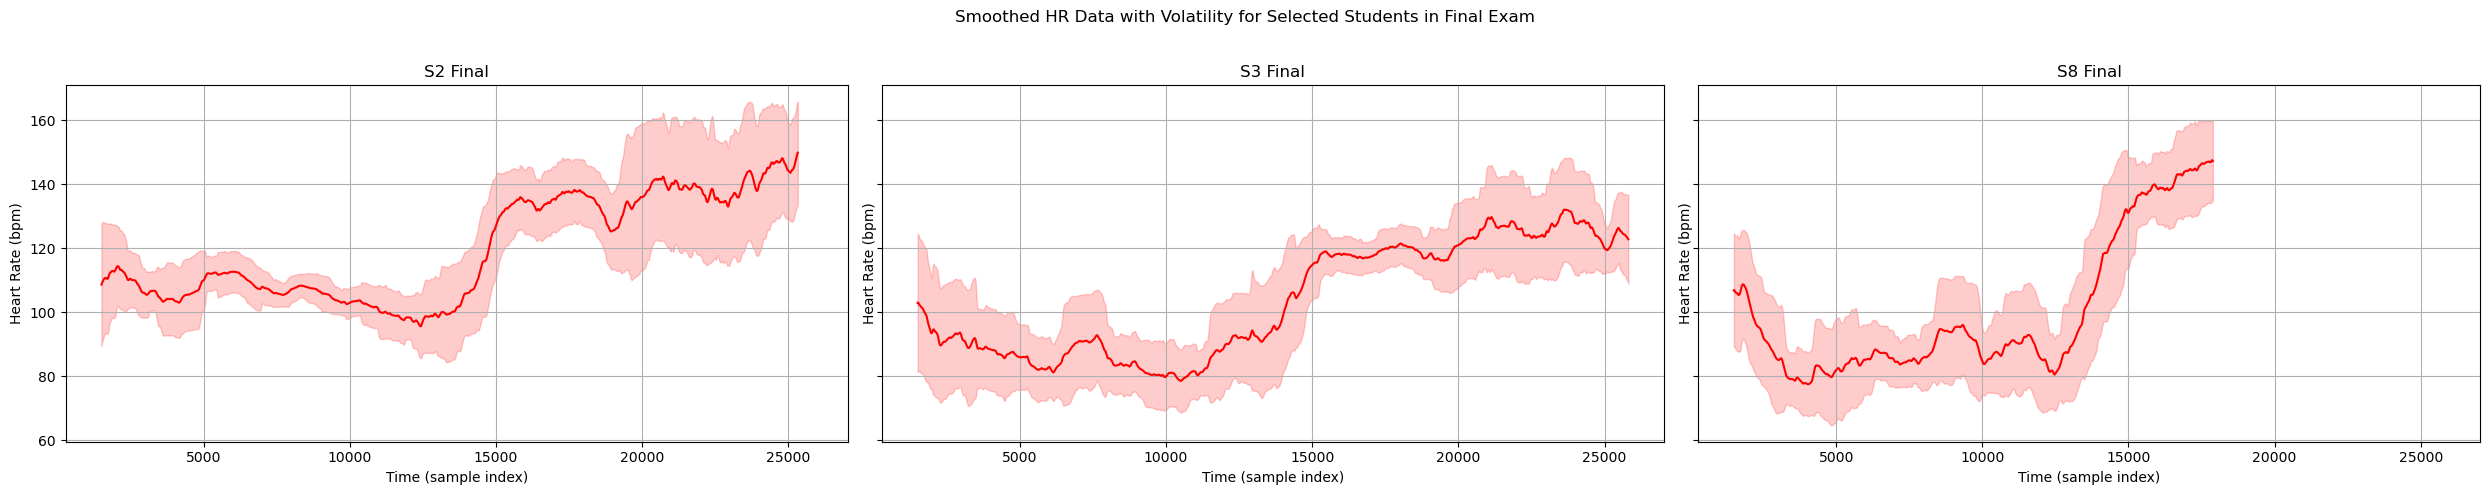

In [14]:
# Visualize HR data of S1, S3, and S8 for the final exam
# Average heart rate extracted from the BVP signal.The first row is the initial time of the session expressed as unix timestamp in UTC.
# The second row is the sample rate expressed in Hz.


selected_students = ['S2', 'S3', 'S8']
num_students = len(selected_students)

fig, axes = plt.subplots(1, num_students, figsize=(25, 5), sharex=True, sharey=True)
fig.suptitle('HR Data for Selected Students in Final Exam')

for col, student_id in enumerate(selected_students):
    student_info = student_data[student_id]
    assessment_data = student_info['Final']
    ax = axes[col]
    ax.plot(assessment_data['HR.csv'].index, assessment_data['HR.csv'].iloc[:, 0], label="HR Signal", color="red")
    ax.set_title(f"{student_id} Final")
    ax.set_xlabel("Time (sample index)")
    ax.set_ylabel("Heart Rate (bpm)")
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
# Applying a rolling average with a window size of 50 to smooth the HR data
window_size = 1500

fig, axes = plt.subplots(1, num_students, figsize=(25, 5), sharex=True, sharey=True)
fig.suptitle('Smoothed HR Data for Selected Students in Final Exam')

for col, student_id in enumerate(selected_students):
    student_info = student_data[student_id]
    assessment_data = student_info['Final']
    ax = axes[col]
    smoothed_hr = assessment_data['HR.csv'].iloc[:, 0].rolling(window=window_size).mean()
    ax.plot(smoothed_hr.index, smoothed_hr, label="Smoothed HR Signal", color="red")
    ax.set_title(f"{student_id} Final")
    ax.set_xlabel("Time (sample index)")
    ax.set_ylabel("Heart Rate (bpm)")
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
# Calculate and plot the standard deviation as a shaded region
fig, axes = plt.subplots(1, num_students, figsize=(25, 5), sharex=True, sharey=True)
fig.suptitle('Smoothed HR Data with Volatility for Selected Students in Final Exam')

for col, student_id in enumerate(selected_students):
    student_info = student_data[student_id]
    assessment_data = student_info['Final']
    ax = axes[col]
    smoothed_hr = assessment_data['HR.csv'].iloc[:, 0].rolling(window=window_size).mean()
    hr_std = assessment_data['HR.csv'].iloc[:, 0].rolling(window=window_size).std()
    ax.plot(smoothed_hr.index, smoothed_hr, label="Smoothed HR Signal", color="red")
    ax.fill_between(smoothed_hr.index, smoothed_hr - hr_std, smoothed_hr + hr_std, color='red', alpha=0.2)
    ax.set_title(f"{student_id} Final")
    ax.set_xlabel("Time (sample index)")
    ax.set_ylabel("Heart Rate (bpm)")
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

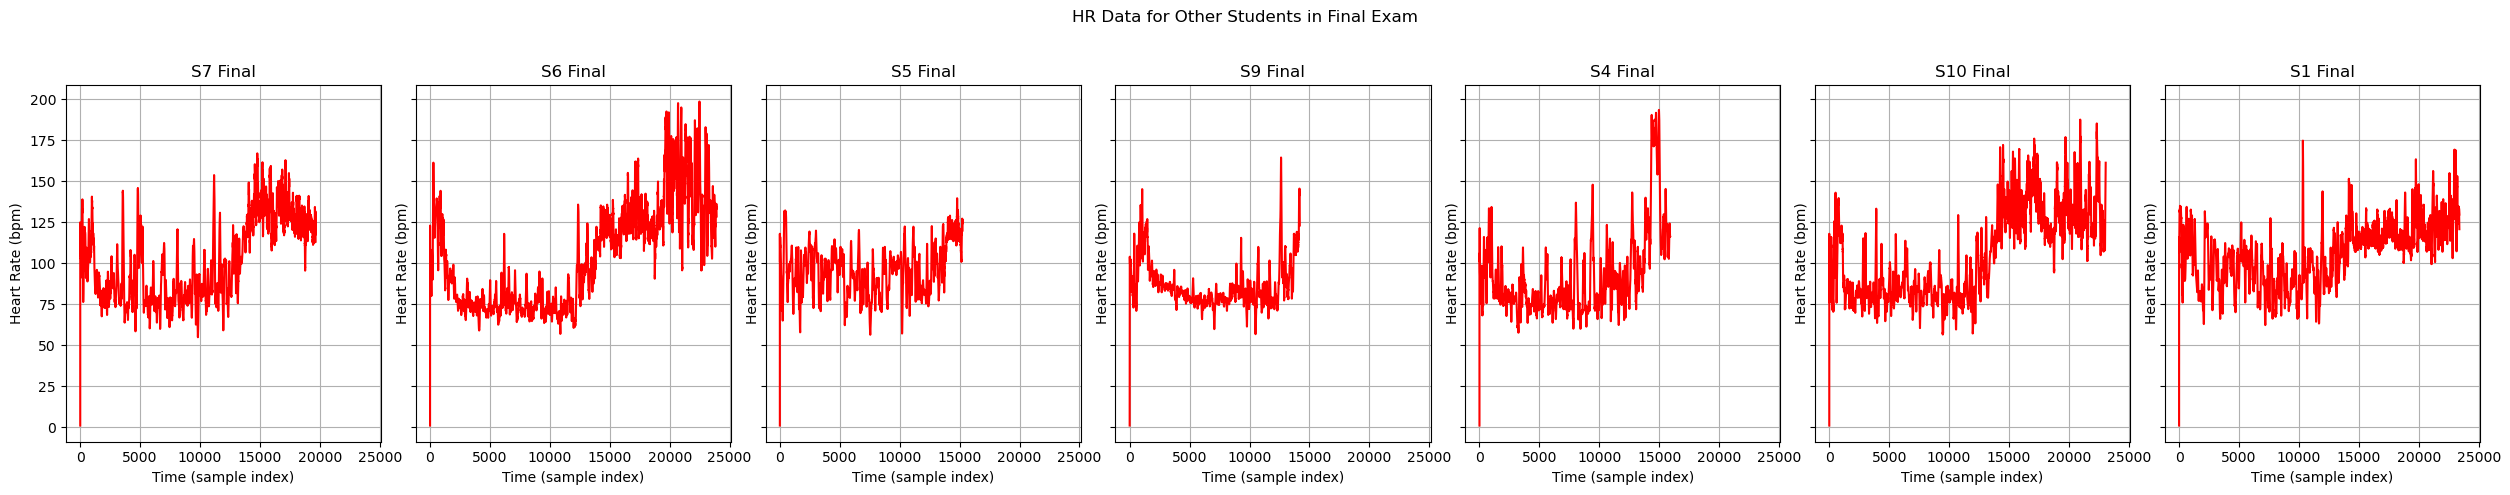

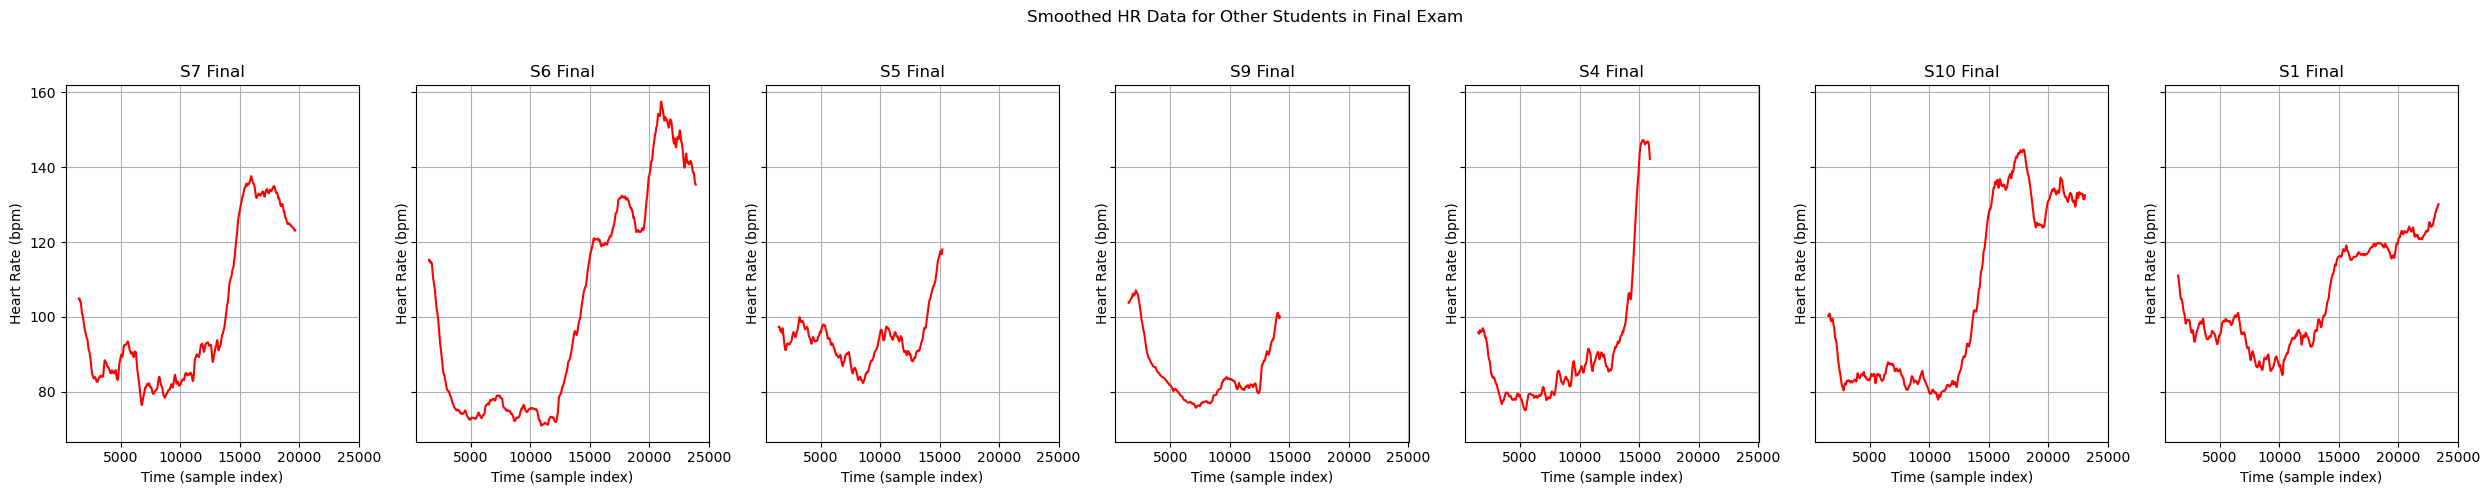

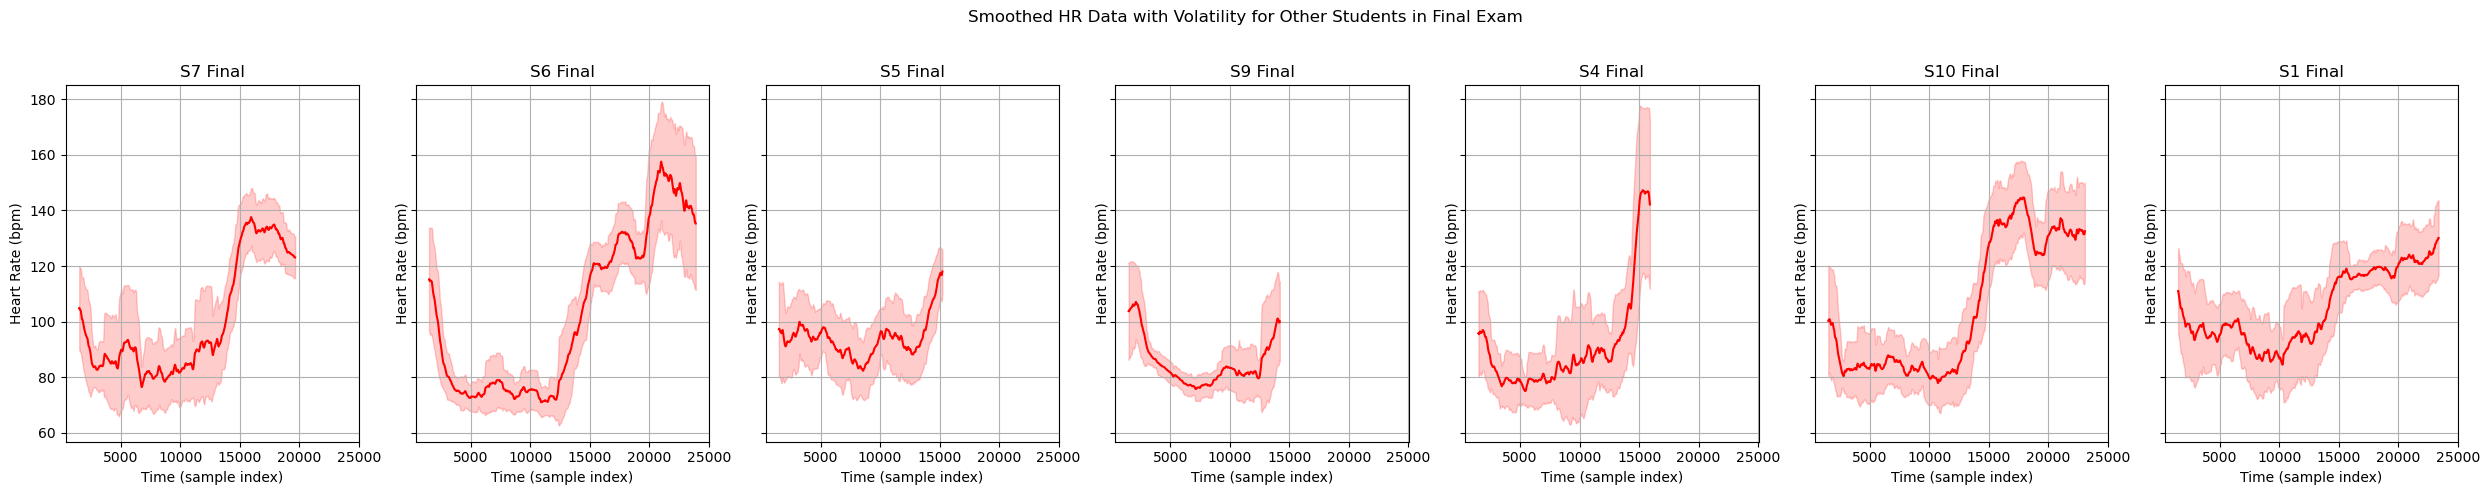

In [15]:
# Visualize HR data of other students in the final exam

# Average heart rate extracted from the BVP signal. The first row is the initial time of the session expressed as unix timestamp in UTC.
# The second row is the sample rate expressed in Hz.

other_students = list(all_students - set(['S2', 'S3', 'S8']))
num_students = len(other_students)

fig, axes = plt.subplots(1, num_students, figsize=(25, 5), sharex=True, sharey=True)
fig.suptitle('HR Data for Other Students in Final Exam')

for col, student_id in enumerate(other_students):
    student_info = student_data[student_id]
    assessment_data = student_info['Final']
    ax = axes[col]
    ax.plot(assessment_data['HR.csv'].index, assessment_data['HR.csv'].iloc[:, 0], label="HR Signal", color="red")
    ax.set_title(f"{student_id} Final")
    ax.set_xlabel("Time (sample index)")
    ax.set_ylabel("Heart Rate (bpm)")
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Applying a rolling average with a window size of 50 to smooth the HR data
window_size = 1500

fig, axes = plt.subplots(1, num_students, figsize=(25, 5), sharex=True, sharey=True)
fig.suptitle('Smoothed HR Data for Other Students in Final Exam')

for col, student_id in enumerate(other_students):
    student_info = student_data[student_id]
    assessment_data = student_info['Final']
    ax = axes[col]
    smoothed_hr = assessment_data['HR.csv'].iloc[:, 0].rolling(window=window_size).mean()
    ax.plot(smoothed_hr.index, smoothed_hr, label="Smoothed HR Signal", color="red")
    ax.set_title(f"{student_id} Final")
    ax.set_xlabel("Time (sample index)")
    ax.set_ylabel("Heart Rate (bpm)")
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Calculate and plot the standard deviation as a shaded region
fig, axes = plt.subplots(1, num_students, figsize=(25, 5), sharex=True, sharey=True)
fig.suptitle('Smoothed HR Data with Volatility for Other Students in Final Exam')

for col, student_id in enumerate(other_students):
    student_info = student_data[student_id]
    assessment_data = student_info['Final']
    ax = axes[col]
    smoothed_hr = assessment_data['HR.csv'].iloc[:, 0].rolling(window=window_size).mean()
    hr_std = assessment_data['HR.csv'].iloc[:, 0].rolling(window=window_size).std()
    ax.plot(smoothed_hr.index, smoothed_hr, label="Smoothed HR Signal", color="red")
    ax.fill_between(smoothed_hr.index, smoothed_hr - hr_std, smoothed_hr + hr_std, color='red', alpha=0.2)
    ax.set_title(f"{student_id} Final")
    ax.set_xlabel("Time (sample index)")
    ax.set_ylabel("Heart Rate (bpm)")
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

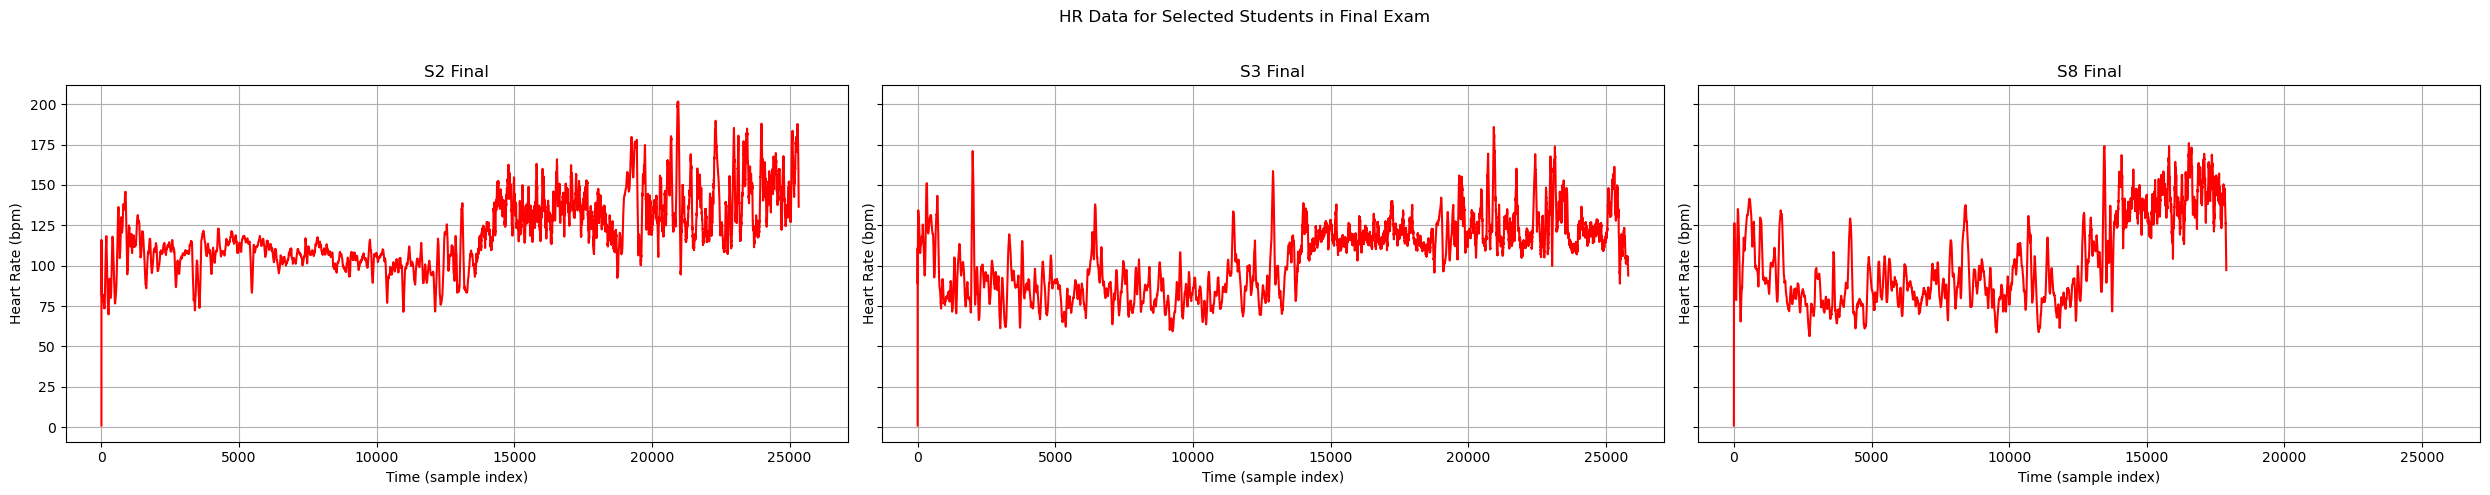

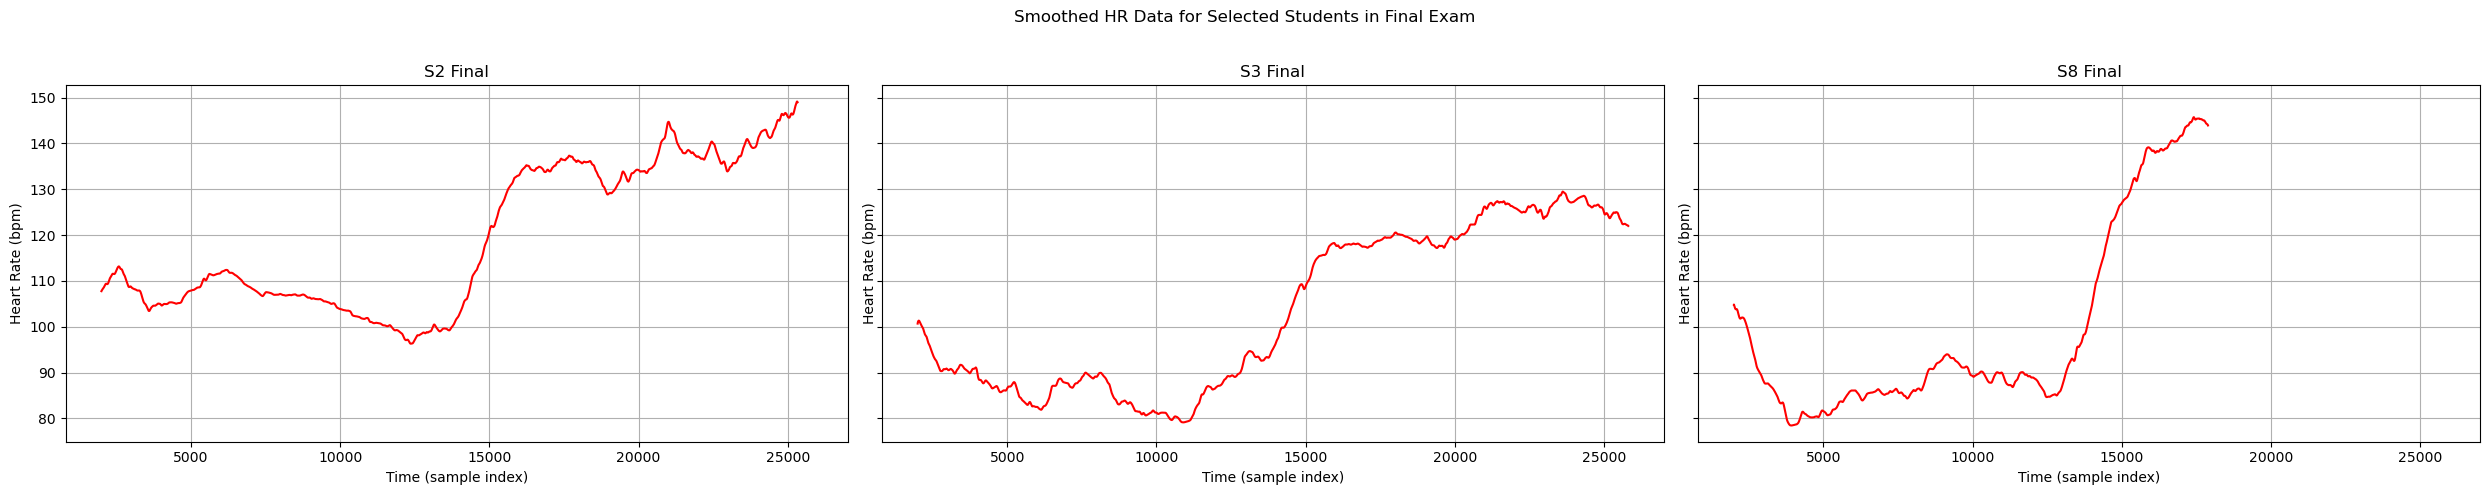

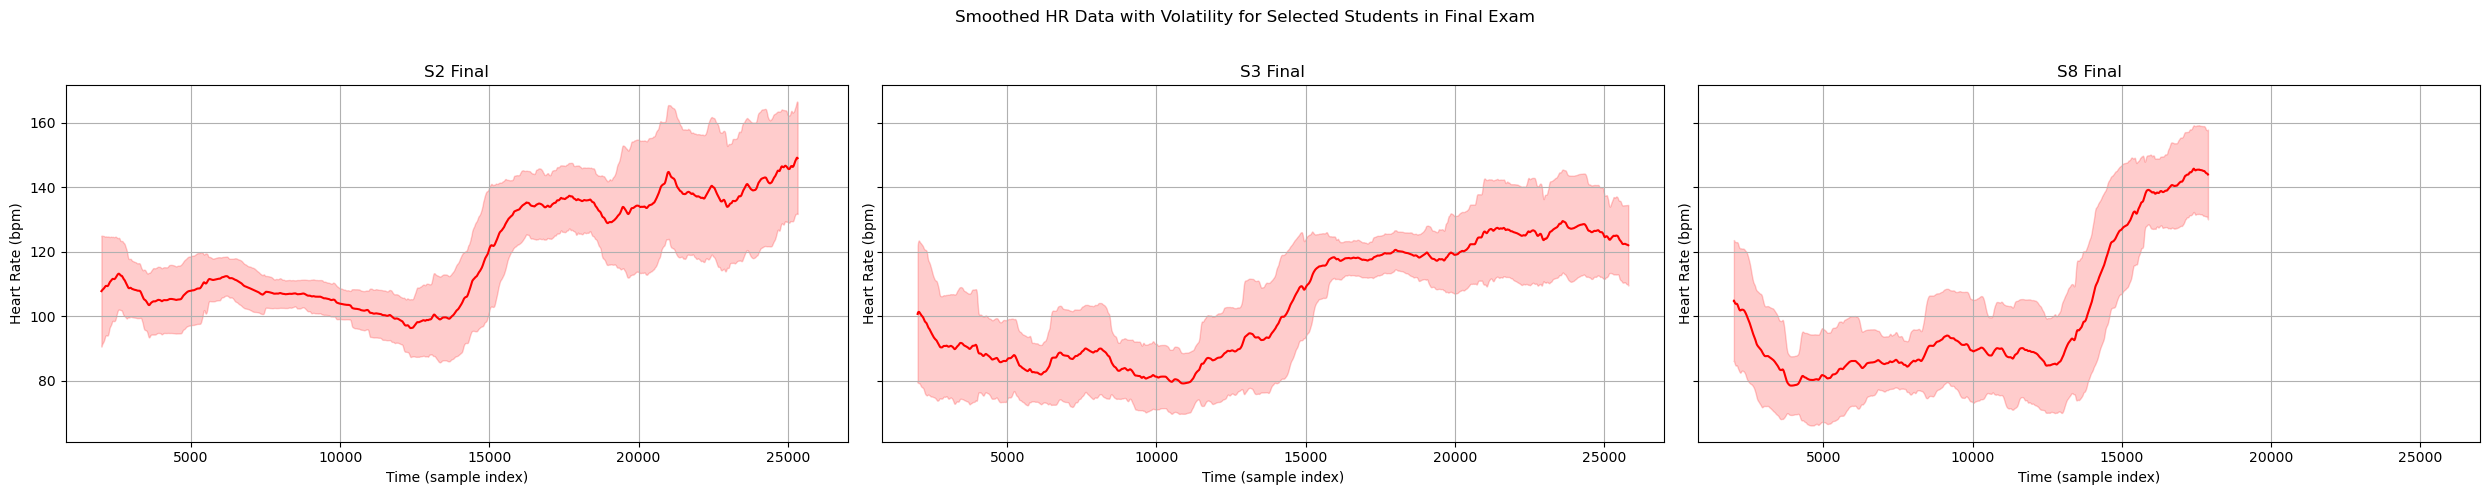

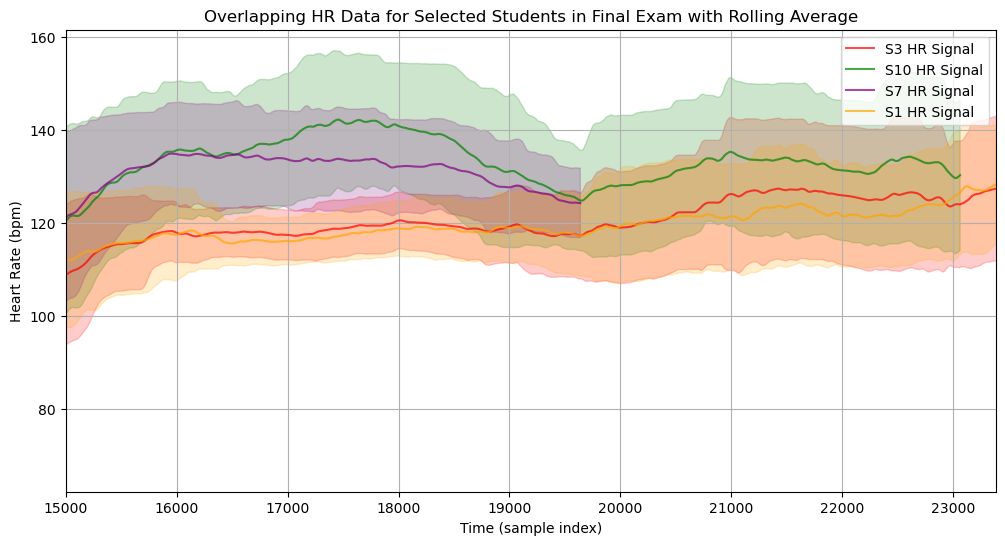

In [16]:
# Visualize HR data of S1, S3, and S8 for the final exam
# Average heart rate extracted from the BVP signal.The first row is the initial time of the session expressed as unix timestamp in UTC.
# The second row is the sample rate expressed in Hz.


selected_students = ['S2', 'S3', 'S8']
num_students = len(selected_students)

fig, axes = plt.subplots(1, num_students, figsize=(25, 5), sharex=True, sharey=True)
fig.suptitle('HR Data for Selected Students in Final Exam')

for col, student_id in enumerate(selected_students):
    student_info = student_data[student_id]
    assessment_data = student_info['Final']
    ax = axes[col]
    ax.plot(assessment_data['HR.csv'].index, assessment_data['HR.csv'].iloc[:, 0], label="HR Signal", color="red")
    ax.set_title(f"{student_id} Final")
    ax.set_xlabel("Time (sample index)")
    ax.set_ylabel("Heart Rate (bpm)")
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
# Applying a rolling average with a window size of 50 to smooth the HR data
window_size = 2000

fig, axes = plt.subplots(1, num_students, figsize=(25, 5), sharex=True, sharey=True)
fig.suptitle('Smoothed HR Data for Selected Students in Final Exam')

for col, student_id in enumerate(selected_students):
    student_info = student_data[student_id]
    assessment_data = student_info['Final']
    ax = axes[col]
    smoothed_hr = assessment_data['HR.csv'].iloc[:, 0].rolling(window=window_size).mean()
    ax.plot(smoothed_hr.index, smoothed_hr, label="Smoothed HR Signal", color="red")
    ax.set_title(f"{student_id} Final")
    ax.set_xlabel("Time (sample index)")
    ax.set_ylabel("Heart Rate (bpm)")
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
# Calculate and plot the standard deviation as a shaded region
fig, axes = plt.subplots(1, num_students, figsize=(25, 5), sharex=True, sharey=True)
fig.suptitle('Smoothed HR Data with Volatility for Selected Students in Final Exam')

for col, student_id in enumerate(selected_students):
    student_info = student_data[student_id]
    assessment_data = student_info['Final']
    ax = axes[col]
    smoothed_hr = assessment_data['HR.csv'].iloc[:, 0].rolling(window=window_size).mean()
    hr_std = assessment_data['HR.csv'].iloc[:, 0].rolling(window=window_size).std()
    ax.plot(smoothed_hr.index, smoothed_hr, label="Smoothed HR Signal", color="red")
    ax.fill_between(smoothed_hr.index, smoothed_hr - hr_std, smoothed_hr + hr_std, color='red', alpha=0.2)
    ax.set_title(f"{student_id} Final")
    ax.set_xlabel("Time (sample index)")
    ax.set_ylabel("Heart Rate (bpm)")
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
# Plot HR data of selected students overlapping with each other on the same chart with rolling average of window size 2000
selected_students = ['S3', 'S10', 'S7', 'S1']
colors = ['red', 'green', 'purple', 'orange']

plt.figure(figsize=(12, 6))
plt.title('Overlapping HR Data for Selected Students in Final Exam with Rolling Average')

for student_id, color in zip(selected_students, colors):
    student_info = student_data[student_id]
    assessment_data = student_info['Final']
    smoothed_hr = assessment_data['HR.csv'].iloc[:, 0].rolling(window=window_size).mean()
    hr_std = assessment_data['HR.csv'].iloc[:, 0].rolling(window=window_size).std()
    plt.plot(smoothed_hr.index, smoothed_hr, label=f"{student_id} HR Signal", color=color, alpha=0.7)
    plt.fill_between(smoothed_hr.index, smoothed_hr - hr_std, smoothed_hr + hr_std, color=color, alpha=0.2)

plt.xlim(15000, smoothed_hr.index.max())
plt.xlabel("Time (sample index)")
plt.ylabel("Heart Rate (bpm)")
plt.grid(True)
plt.legend()
plt.show()

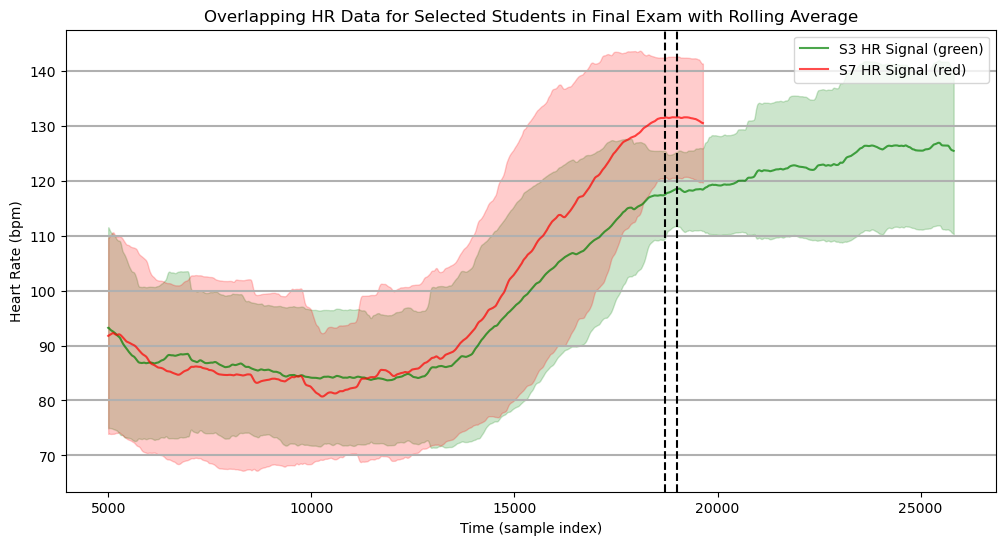

In [17]:
selected_students = ['S3', 'S7']
colors = ['green', 'red']  # S7 and S1 are colored red
window_size = 5000

plt.figure(figsize=(12, 6))
plt.title('Overlapping HR Data for Selected Students in Final Exam with Rolling Average')

for student_id, color in zip(selected_students, colors):
    student_info = student_data[student_id]
    assessment_data = student_info['Final']
    smoothed_hr = assessment_data['HR.csv'].iloc[:, 0].rolling(window=window_size).mean()
    hr_std = assessment_data['HR.csv'].iloc[:, 0].rolling(window=window_size).std()
    plt.plot(smoothed_hr.index, smoothed_hr, label=f"{student_id} HR Signal ({color})", color=color, alpha=0.7)
    plt.fill_between(smoothed_hr.index, smoothed_hr - hr_std, smoothed_hr + hr_std, color=color, alpha=0.2)

# plt.xlim(16875, smoothed_hr.index.max())
# plt.ylim(100, )  # Adjusted y-axis range
plt.xlabel("Time (sample index)")
plt.ylabel("Heart Rate (bpm)")
plt.grid(True, which='both', axis='y', linewidth=1.5)  # Adjusting grid line width and style
plt.legend()

plt.axvline(x=18700, color='black', linestyle='--', linewidth=1.5)
plt.axvline(x=19000, color='black', linestyle='--', linewidth=1.5)

plt.show()


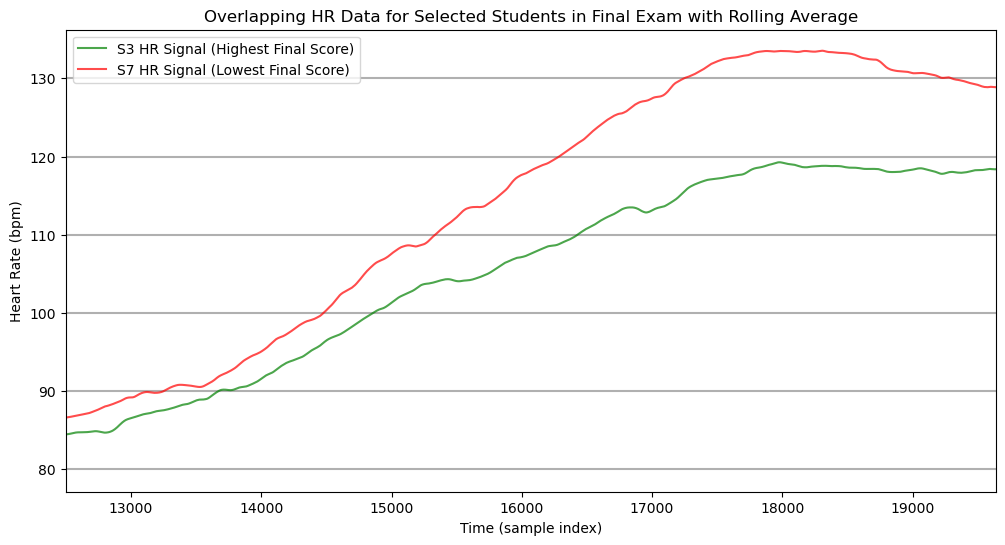

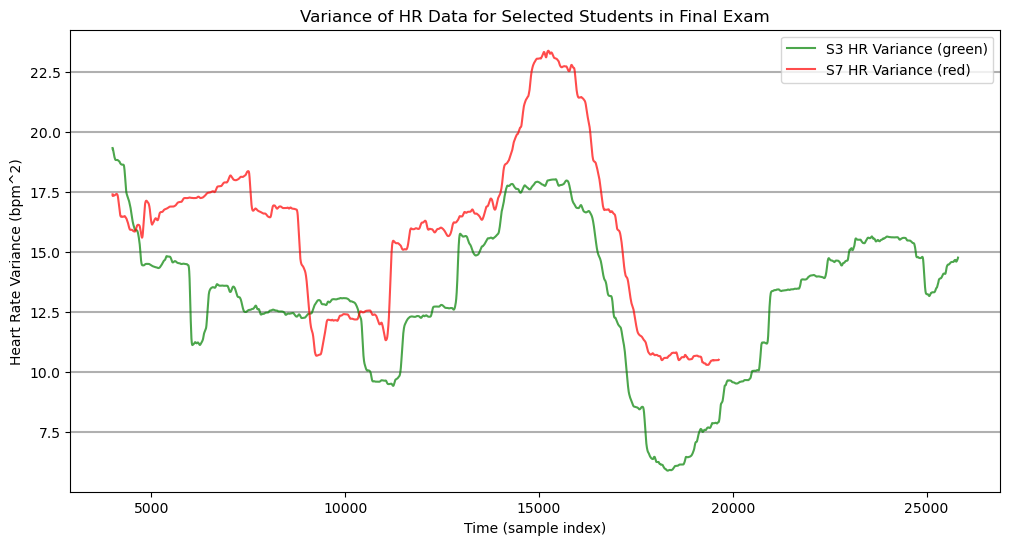

In [18]:
selected_students = ['S3', 'S7']
colors = ['green', 'red']  # Green for best performing, red for worst performing
window_size = 4000

plt.figure(figsize=(12, 6))
plt.title('Overlapping HR Data for Selected Students in Final Exam with Rolling Average')

for student_id, color in zip(selected_students, colors):
    student_info = student_data[student_id]
    assessment_data = student_info['Final']
    smoothed_hr = assessment_data['HR.csv'].iloc[:, 0].rolling(window=window_size).mean()
    hr_std = assessment_data['HR.csv'].iloc[:, 0].rolling(window=window_size).std()
    legend_label = f"{student_id} HR Signal ({'Highest Final Score' if color == 'green' else 'Lowest Final Score'})"
    plt.plot(smoothed_hr.index, smoothed_hr, label=legend_label, color=color, alpha=0.7)


plt.xlim(12500, smoothed_hr.index.max())
plt.xlabel("Time (sample index)")
plt.ylabel("Heart Rate (bpm)")
plt.grid(True, which='both', axis='y', linewidth=1.5)  # Adjusting grid line width and style
plt.legend(
    loc='upper left',
    fontsize='medium',
)
plt.show()

# Plotting the variance of HR data for selected students
plt.figure(figsize=(12, 6))
plt.title('Variance of HR Data for Selected Students in Final Exam')

for student_id, color in zip(selected_students, colors):
    student_info = student_data[student_id]
    assessment_data = student_info['Final']
    hr_std = assessment_data['HR.csv'].iloc[:, 0].rolling(window=window_size).std()
    plt.plot(hr_std.index, hr_std, label=f"{student_id} HR Variance ({color})", color=color, alpha=0.7)

plt.xlabel("Time (sample index)")
plt.ylabel("Heart Rate Variance (bpm^2)")
plt.grid(True, which='both', axis='y', linewidth=1.5)
plt.legend()
plt.show()

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `student_data` is defined elsewhere and contains necessary data.
# Simulated sample data for demonstration.
import numpy as np

# Generating synthetic HR data for visualization
np.random.seed(42)
time_index = np.arange(13000, 18000)  # Simulated time index
hr_data_best = np.cumsum(np.random.randn(len(time_index))) + 70  # Simulated best performer HR
hr_data_worst = np.cumsum(np.random.randn(len(time_index))) + 90  # Simulated worst performer HR

# Creating DataFrame for HR data
hr_df_best = pd.DataFrame(hr_data_best, index=time_index, columns=["HR"])
hr_df_worst = pd.DataFrame(hr_data_worst, index=time_index, columns=["HR"])


In [20]:
hr_data_best

array([70.49671415, 70.35844985, 71.00613839, ..., 98.04967985,
       98.85771604, 98.00965044])

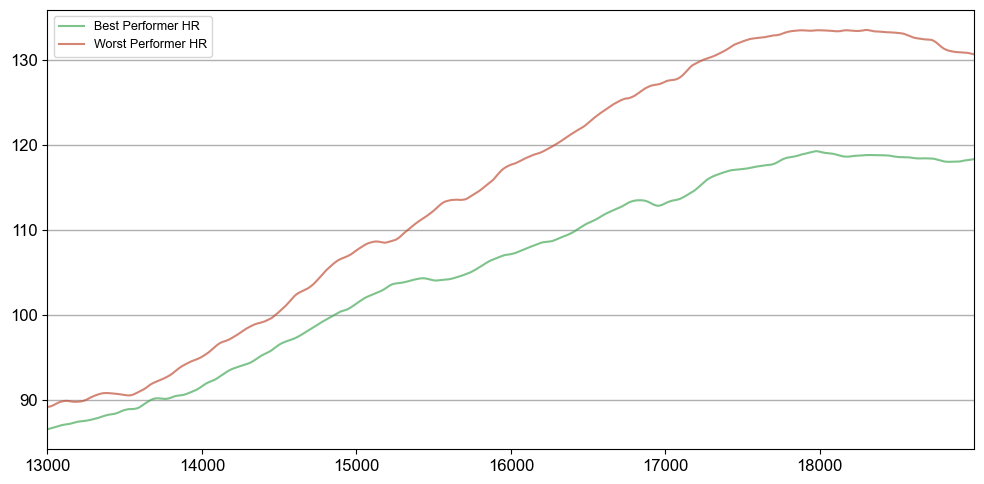

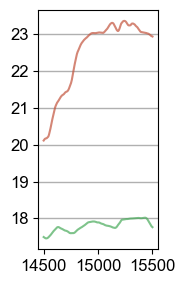

In [21]:
# Set the font globally
rcParams["font.family"] = "Arial"
rcParams["font.size"] = 12  # Increase default font size

# Define manually converted Oklab colors in RGB (normalized between 0-1)
oklab_best = (72/255, 170/255, 90/255)  # Cool green
oklab_worst = (194/255, 83/255, 60/255)  # Warm reddish-orange

# Assigning HR data for best (S3) and worst (S7) performers
hr_data_best = np.array(student_data['S3']['Final']['HR.csv'].iloc[1:, 0])
hr_data_worst = np.array(student_data['S7']['Final']['HR.csv'].iloc[1:, 0])

# Assign time index starting from 0
time_index_best = np.arange(len(hr_data_best))
time_index_worst = np.arange(len(hr_data_worst))

# Creating DataFrame for HR data
hr_df_best = pd.DataFrame(hr_data_best, index=time_index_best, columns=["HR"])
hr_df_worst = pd.DataFrame(hr_data_worst, index=time_index_worst, columns=["HR"])

# Selecting time range (9000-19000)
time_index = np.arange(9000, 19000)
hr_df_best = hr_df_best.loc[time_index]
hr_df_worst = hr_df_worst.loc[time_index]

# Computing rolling mean and variance
window_size = 4000
smoothed_hr_best = hr_df_best["HR"].rolling(window=window_size).mean()
smoothed_hr_worst = hr_df_worst["HR"].rolling(window=window_size).mean()
hr_var_best = hr_df_best["HR"].rolling(window=window_size).std()
hr_var_worst = hr_df_worst["HR"].rolling(window=window_size).std()

# Creating main figure for smoothed HR data
fig_main, ax_main = plt.subplots(figsize=(10, 5))  # Smaller figure
ax_main.set_title("")  # Hide title

# Plot smoothed HR data using manually set Oklab colors
ax_main.plot(smoothed_hr_best.index, smoothed_hr_best, label="Best Performer HR", color=oklab_best, alpha=0.7)
ax_main.plot(smoothed_hr_worst.index, smoothed_hr_worst, label="Worst Performer HR", color=oklab_worst, alpha=0.7)

ax_main.set_xlim(13000, max(time_index))
ax_main.set_xlabel("")  # Hide x-axis label
ax_main.set_ylabel("")  # Hide y-axis label
ax_main.grid(True, which='both', axis='y', linewidth=1)
ax_main.legend(loc='upper left', fontsize=9)

plt.tight_layout()
plt.show()

# Creating inset figure for HR variance
fig_inset, ax_inset = plt.subplots(figsize=(2, 3))  # Smaller figure
ax_inset.set_title("")  # Hide title

# Making x-axis visually shorter
x_subset = hr_var_best.loc[14500:15500].index
ax_inset.plot(x_subset, hr_var_best.loc[x_subset], color=oklab_best, alpha=0.7)
ax_inset.plot(x_subset, hr_var_worst.loc[x_subset], color=oklab_worst, alpha=0.7)

# Adjusting x-axis ticks to minimize width perception
ax_inset.set_xticks([14500, 15000, 15500])
ax_inset.set_xlabel("")  # Hide x-axis label
ax_inset.set_ylabel("")  # Hide y-axis label
ax_inset.grid(True, which='both', axis='y', linewidth=1)

plt.tight_layout()
plt.show()

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

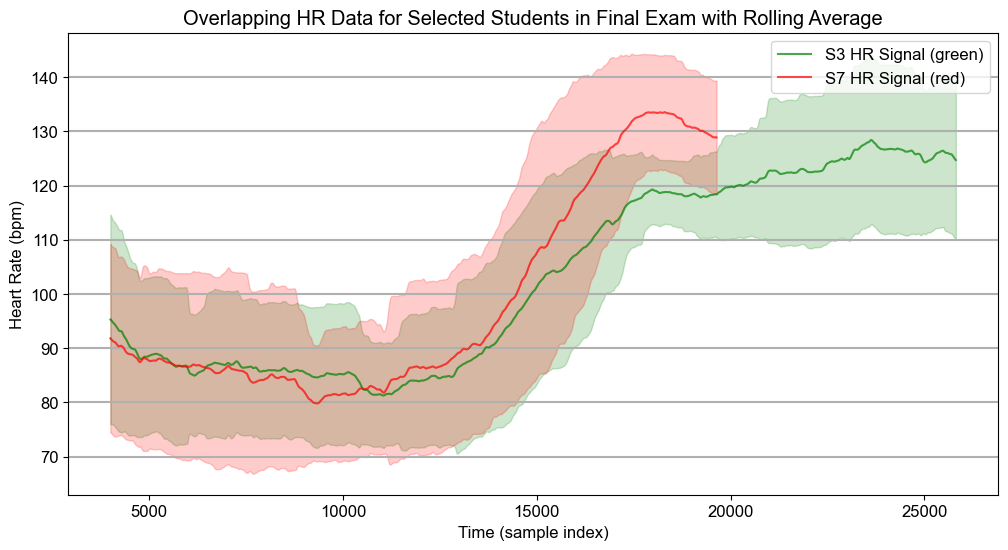

In [23]:
selected_students = ['S3', 'S7']
colors = ['green', 'red']  # S7 and S1 are colored red
window_size = 4000

plt.figure(figsize=(12, 6))
plt.title('Overlapping HR Data for Selected Students in Final Exam with Rolling Average')

for student_id, color in zip(selected_students, colors):
    student_info = student_data[student_id]
    assessment_data = student_info['Final']
    smoothed_hr = assessment_data['HR.csv'].iloc[:, 0].rolling(window=window_size).mean()
    hr_std = assessment_data['HR.csv'].iloc[:, 0].rolling(window=window_size).std()
    plt.plot(smoothed_hr.index, smoothed_hr, label=f"{student_id} HR Signal ({color})", color=color, alpha=0.7)
    plt.fill_between(smoothed_hr.index, smoothed_hr - hr_std, smoothed_hr + hr_std, color=color, alpha=0.2)

# plt.xlim(17500, 20000)
# plt.ylim(18700, 19000)  # Adjusted y-axis range
plt.xlabel("Time (sample index)")
plt.ylabel("Heart Rate (bpm)")
plt.grid(True, which='both', axis='y', linewidth=1.5)  # Adjusting grid line width and style
plt.legend()

# plt.axvline(x=18600, color='black', linestyle='--', linewidth=1.5)
# plt.axvline(x=19000, color='black', linestyle='--', linewidth=1.5)


plt.show()

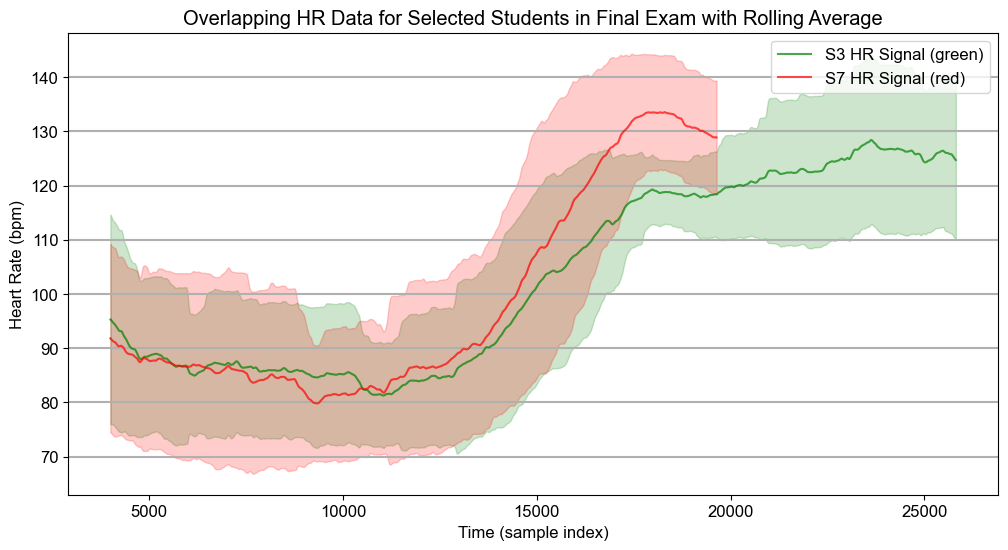

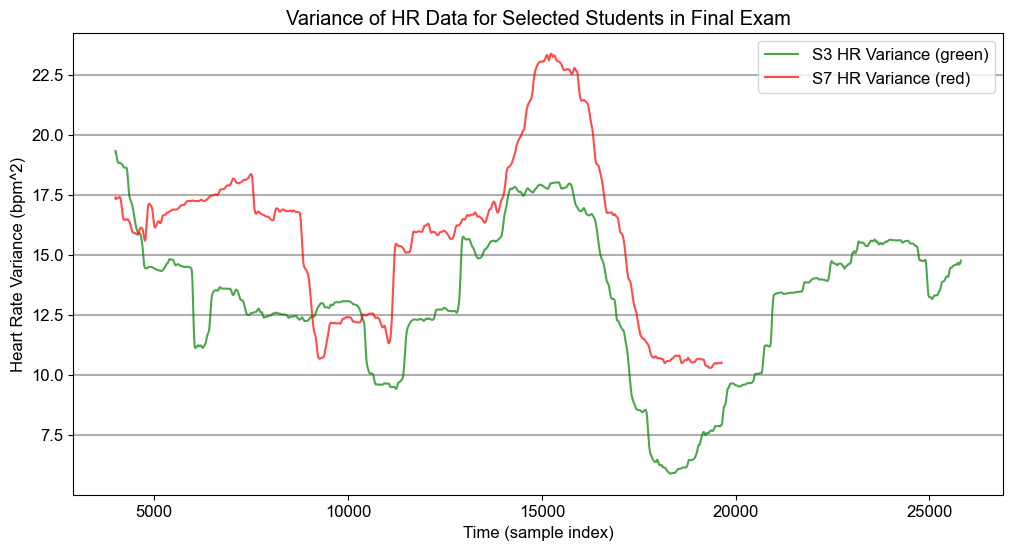

In [24]:
selected_students = ['S3', 'S7']
colors = ['green', 'red']  # S7 and S1 are colored red
window_size = 4000

plt.figure(figsize=(12, 6))
plt.title('Overlapping HR Data for Selected Students in Final Exam with Rolling Average')

for student_id, color in zip(selected_students, colors):
    student_info = student_data[student_id]
    assessment_data = student_info['Final']
    smoothed_hr = assessment_data['HR.csv'].iloc[:, 0].rolling(window=window_size).mean()
    hr_std = assessment_data['HR.csv'].iloc[:, 0].rolling(window=window_size).std()
    plt.plot(smoothed_hr.index, smoothed_hr, label=f"{student_id} HR Signal ({color})", color=color, alpha=0.7)
    plt.fill_between(smoothed_hr.index, smoothed_hr - hr_std, smoothed_hr + hr_std, color=color, alpha=0.2)

# plt.xlim(17500, 20000)
# plt.ylim(18700, 19000)  # Adjusted y-axis range
plt.xlabel("Time (sample index)")
plt.ylabel("Heart Rate (bpm)")
plt.grid(True, which='both', axis='y', linewidth=1.5)  # Adjusting grid line width and style
plt.legend()

# plt.axvline(x=18600, color='black', linestyle='--', linewidth=1.5)
# plt.axvline(x=19000, color='black', linestyle='--', linewidth=1.5)


plt.show()
# Plotting the variance of HR data for selected students
plt.figure(figsize=(12, 6))
plt.title('Variance of HR Data for Selected Students in Final Exam')

for student_id, color in zip(selected_students, colors):
    student_info = student_data[student_id]
    assessment_data = student_info['Final']
    hr_std = assessment_data['HR.csv'].iloc[:, 0].rolling(window=window_size).std()
    plt.plot(hr_std.index, hr_std, label=f"{student_id} HR Variance ({color})", color=color, alpha=0.7)

plt.xlabel("Time (sample index)")
plt.ylabel("Heart Rate Variance (bpm^2)")
plt.grid(True, which='both', axis='y', linewidth=1.5)
plt.legend()
plt.show()

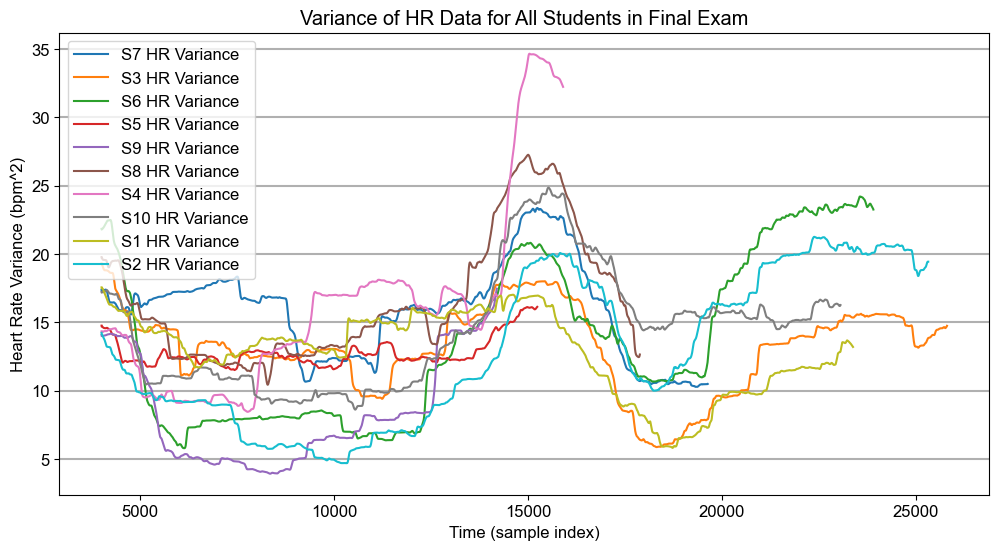

In [25]:
window_size = 4000

plt.figure(figsize=(12, 6))
plt.title('Variance of HR Data for All Students in Final Exam')

for student_id in all_students:
    student_info = student_data[student_id]
    assessment_data = student_info['Final']
    hr_std = assessment_data['HR.csv'].iloc[:, 0].rolling(window=window_size).std()
    plt.plot(hr_std.index, hr_std, label=f"{student_id} HR Variance")

plt.xlabel("Time (sample index)")
plt.ylabel("Heart Rate Variance (bpm^2)")
plt.grid(True, which='both', axis='y', linewidth=1.5)
plt.legend()
plt.show()


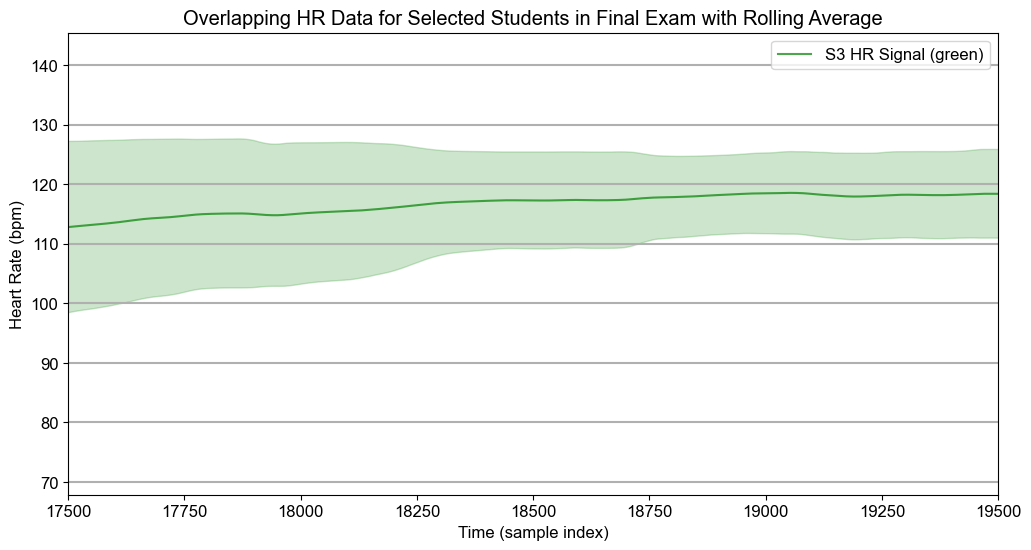

In [26]:
selected_students = ['S3']
colors = ['green']  # S7 and S1 are colored red
window_size = 5000

plt.figure(figsize=(12, 6))
plt.title('Overlapping HR Data for Selected Students in Final Exam with Rolling Average')

for student_id, color in zip(selected_students, colors):
    student_info = student_data[student_id]
    assessment_data = student_info['Final']
    smoothed_hr = assessment_data['HR.csv'].iloc[:, 0].rolling(window=window_size).mean()
    hr_std = assessment_data['HR.csv'].iloc[:, 0].rolling(window=window_size).std()
    plt.plot(smoothed_hr.index, smoothed_hr, label=f"{student_id} HR Signal ({color})", color=color, alpha=0.7)
    plt.fill_between(smoothed_hr.index, smoothed_hr - hr_std, smoothed_hr + hr_std, color=color, alpha=0.2)

plt.xlim(17500, 19500)
# plt.ylim(18700, 19000)  # Adjusted y-axis range
plt.xlabel("Time (sample index)")
plt.ylabel("Heart Rate (bpm)")
plt.grid(True, which='both', axis='y', linewidth=1.5)  # Adjusting grid line width and style
plt.legend()

plt.show()


In [27]:
grades.nlargest(10, "Final (out of 200)")

,Student ID,Midterm 1,Midterm 2,Final (out of 200)
2,S03,77,90,188
7,S08,92,88,184
0,S01,78,82,182
1,S02,82,85,180
5,S06,71,64,175
4,S05,67,77,157
3,S04,75,77,149
8,S09,80,39,126
9,S10,89,64,116
6,S07,64,33,110


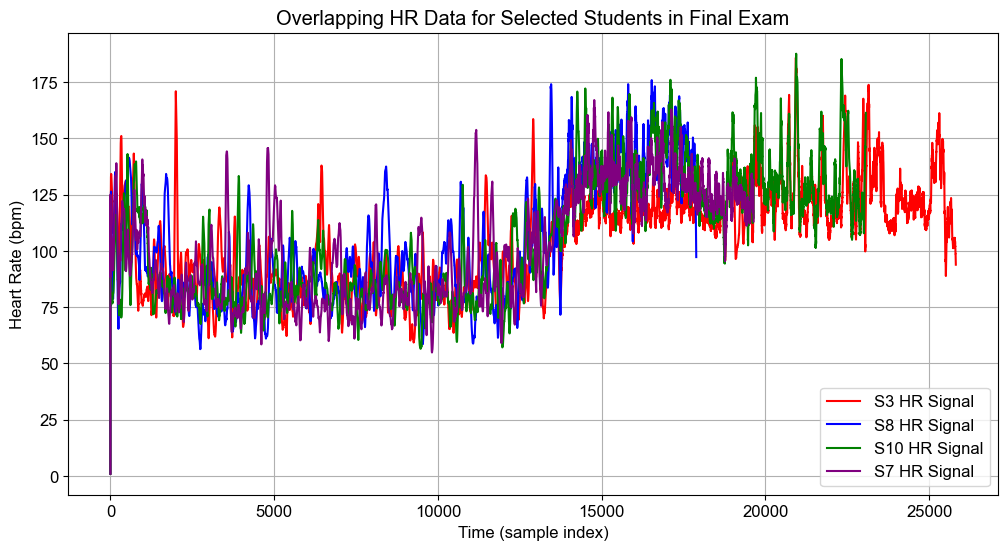

In [28]:
# Visualize overlapping HR data of students S3, S8, S10, and S7 for the final exam
# Average heart rate extracted from the BVP signal. The first row is the initial time of the session expressed as unix timestamp in UTC.
# The second row is the sample rate expressed in Hz.

selected_students = ['S3', 'S8', 'S10', 'S7']
colors = ['red', 'blue', 'green', 'purple']

plt.figure(figsize=(12, 6))
plt.title('Overlapping HR Data for Selected Students in Final Exam')

for student_id, color in zip(selected_students, colors):
    student_info = student_data[student_id]
    assessment_data = student_info['Final']
    plt.plot(assessment_data['HR.csv'].index, assessment_data['HR.csv'].iloc[:, 0], label=f"{student_id} HR Signal", color=color)

plt.xlabel("Time (sample index)")
plt.ylabel("Heart Rate (bpm)")
plt.grid(True)
plt.legend()
plt.show()


## Making earnest visualization

In [ ]:
# finding students who had the best improvement from midterm 1 to final

# find percentage improvement from midterm 1 to final for each student
grades['Midterm 1'] = grades['Midterm 1'].astype(int)
grades['Final (out of 200)'] = grades['Final (out of 200)'].astype(int)
grades['Midterm 1 Percentage'] = grades['Midterm 1'] / 100
grades['Final Percentage'] = grades['Final (out of 200)'] / 200
grades['Percentage Improvement'] = grades['Final Percentage'] - grades['Midterm 1 Percentage']

# find percentage improvement from midterm 2 to final for each student
grades['Midterm 2 Percentage'] = grades['Midterm 2'] / 100
grades['Percentage Improvement Midterm 2'] = grades['Final Percentage'] - grades['Midterm 2 Percentage']

# find the average percentage improvement from midterm 1 and midterm 2 to final for each student
grades['Average Percentage Improvement'] = (grades['Percentage Improvement'] + grades['Percentage Improvement Midterm 2']) / 2

In [30]:
grades.sort_values('Average Percentage Improvement', ascending=False)

,Student ID,Midterm 1,Midterm 2,Final (out of 200),Midterm 1 Percentage,Final Percentage,Percentage Improvement,Midterm 2 Percentage,Percentage Improvement Midterm 2,Average Percentage Improvement
5,S06,71,64,175,0.71,0.875,0.165,0.64,0.235,0.200
0,S01,78,82,182,0.78,0.910,0.130,0.82,0.090,0.110
2,S03,77,90,188,0.77,0.940,0.170,0.90,0.040,0.105
1,S02,82,85,180,0.82,0.900,0.080,0.85,0.050,0.065
6,S07,64,33,110,0.64,0.550,-0.090,0.33,0.220,0.065
4,S05,67,77,157,0.67,0.785,0.115,0.77,0.015,0.065
8,S09,80,39,126,0.80,0.630,-0.170,0.39,0.240,0.035
7,S08,92,88,184,0.92,0.920,0.000,0.88,0.040,0.020
3,S04,75,77,149,0.75,0.745,-0.005,0.77,-0.025,-0.015
9,S10,89,64,116,0.89,0.580,-0.310,0.64,-0.060,-0.185


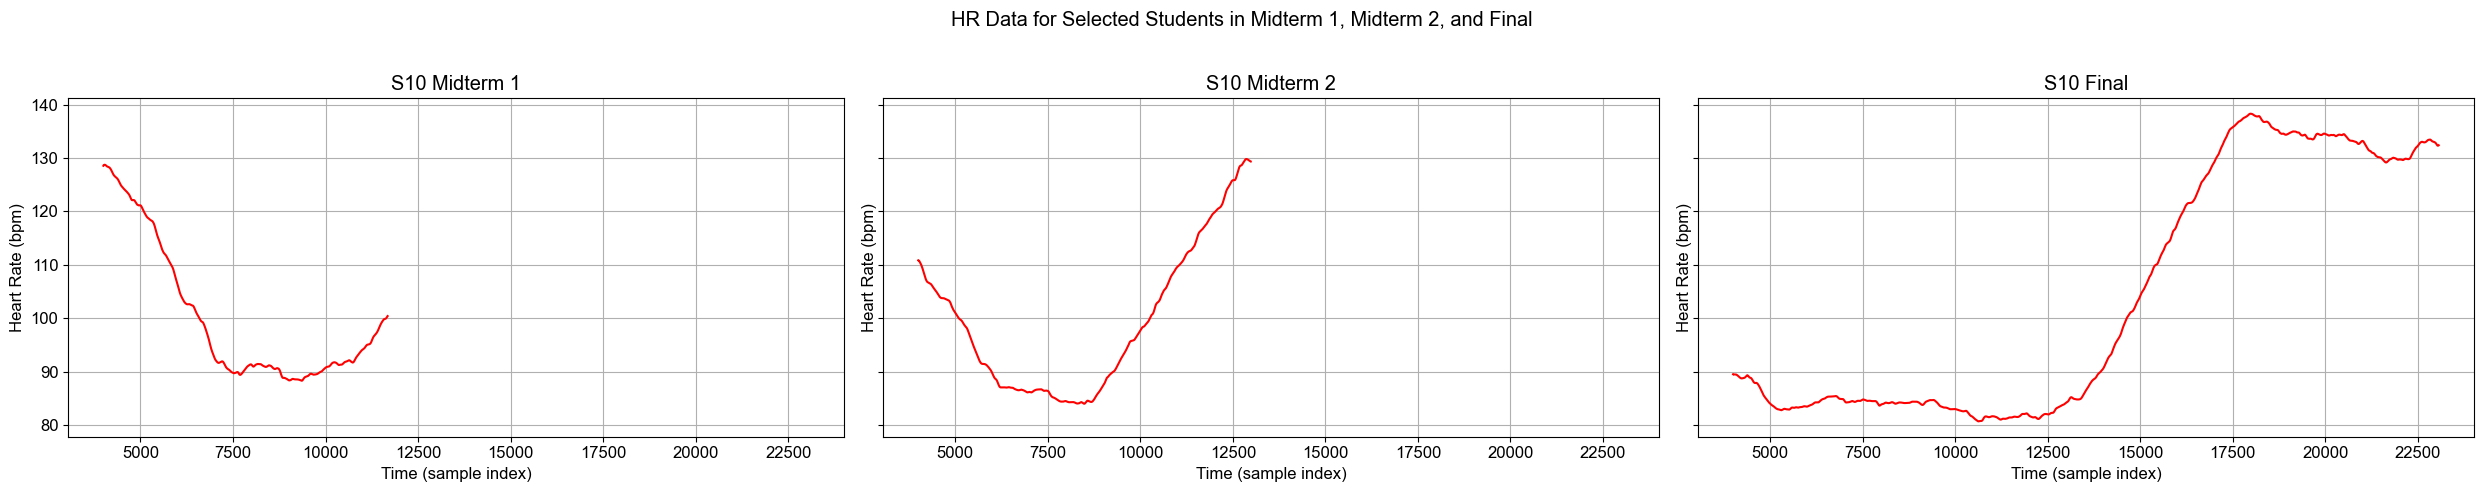

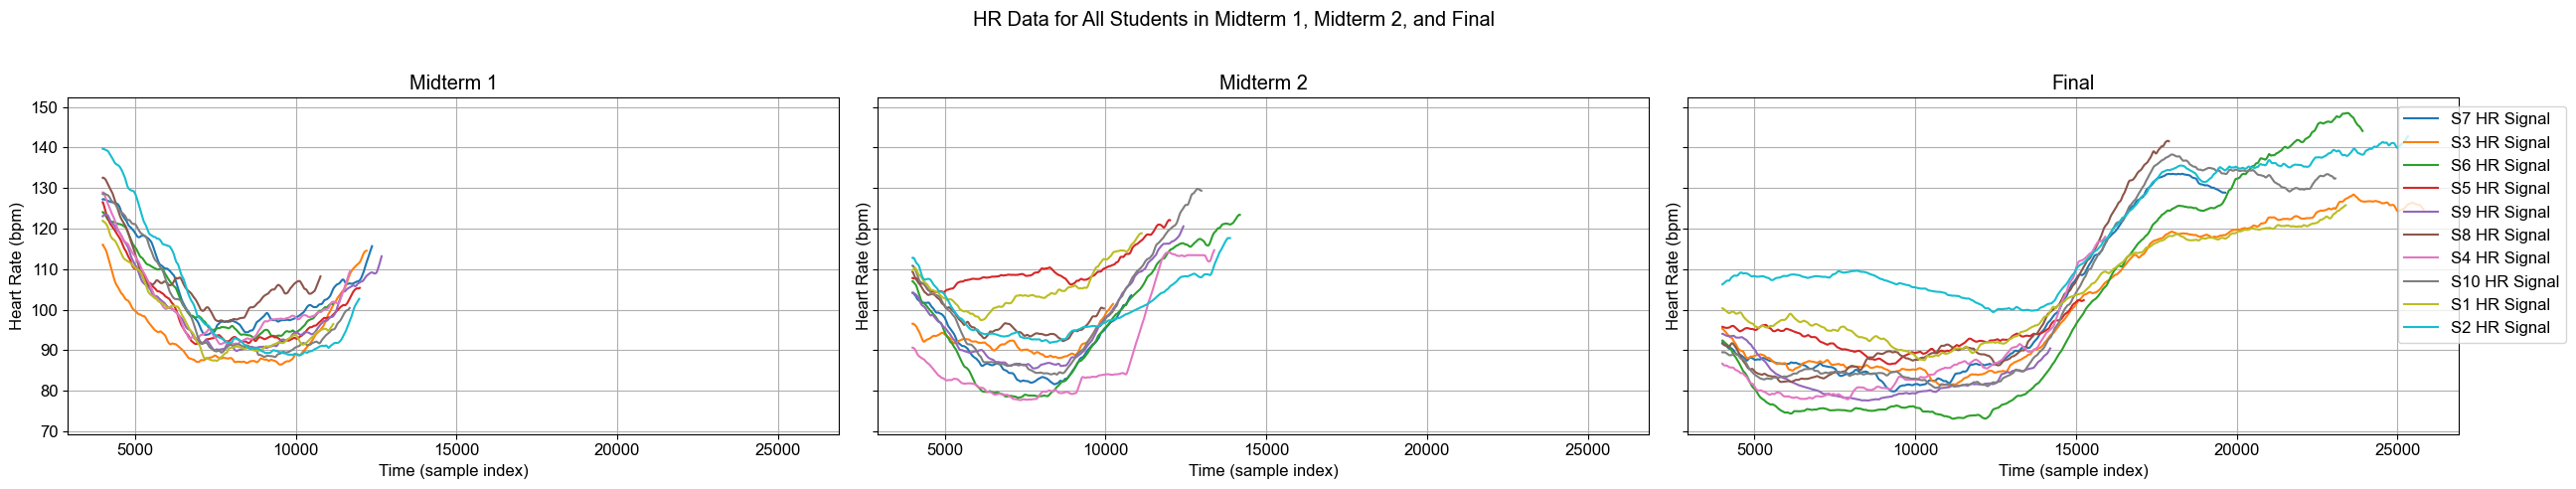

In [31]:
# find the rolling HR for Student S06 during midterm 1, midterm 2 and final

selected_students = ['S10']
num_students = len(selected_students)
assessments = ['Midterm 1', 'Midterm 2', 'Final']
window_size = 4000

fig, axes = plt.subplots(num_students, len(assessments), figsize=(25, 5), sharex=True, sharey=True)
fig.suptitle('HR Data for Selected Students in Midterm 1, Midterm 2, and Final')

if num_students == 1:
    axes = np.array(axes).reshape(1, -1)

for col, assessment in enumerate(assessments):
    for row, student_id in enumerate(selected_students):
        student_info = student_data[student_id]
        assessment_data = student_info[assessment]
        ax = axes[row, col]
        smoothed_hr = assessment_data['HR.csv'].iloc[:, 0].rolling(window=window_size).mean()
        ax.plot(smoothed_hr.index, smoothed_hr, label="HR Signal", color="red")
        ax.set_title(f"{student_id} {assessment}")
        ax.set_xlabel("Time (sample index)")
        ax.set_ylabel("Heart Rate (bpm)")
        ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
# Plot all students' rolling HR on the same plot in three separate visualizations

fig, axes = plt.subplots(1, len(assessments), figsize=(25, 5), sharex=True, sharey=True)
fig.suptitle('HR Data for All Students in Midterm 1, Midterm 2, and Final')

for col, assessment in enumerate(assessments):
    ax = axes[col]
    for student_id in all_students:
        student_info = student_data[student_id]
        assessment_data = student_info[assessment]
        smoothed_hr = assessment_data['HR.csv'].iloc[:, 0].rolling(window=window_size).mean()
        ax.plot(smoothed_hr.index, smoothed_hr, label=f"{student_id} HR Signal")
    ax.set_title(f"{assessment}")
    ax.set_xlabel("Time (sample index)")
    ax.set_ylabel("Heart Rate (bpm)")
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

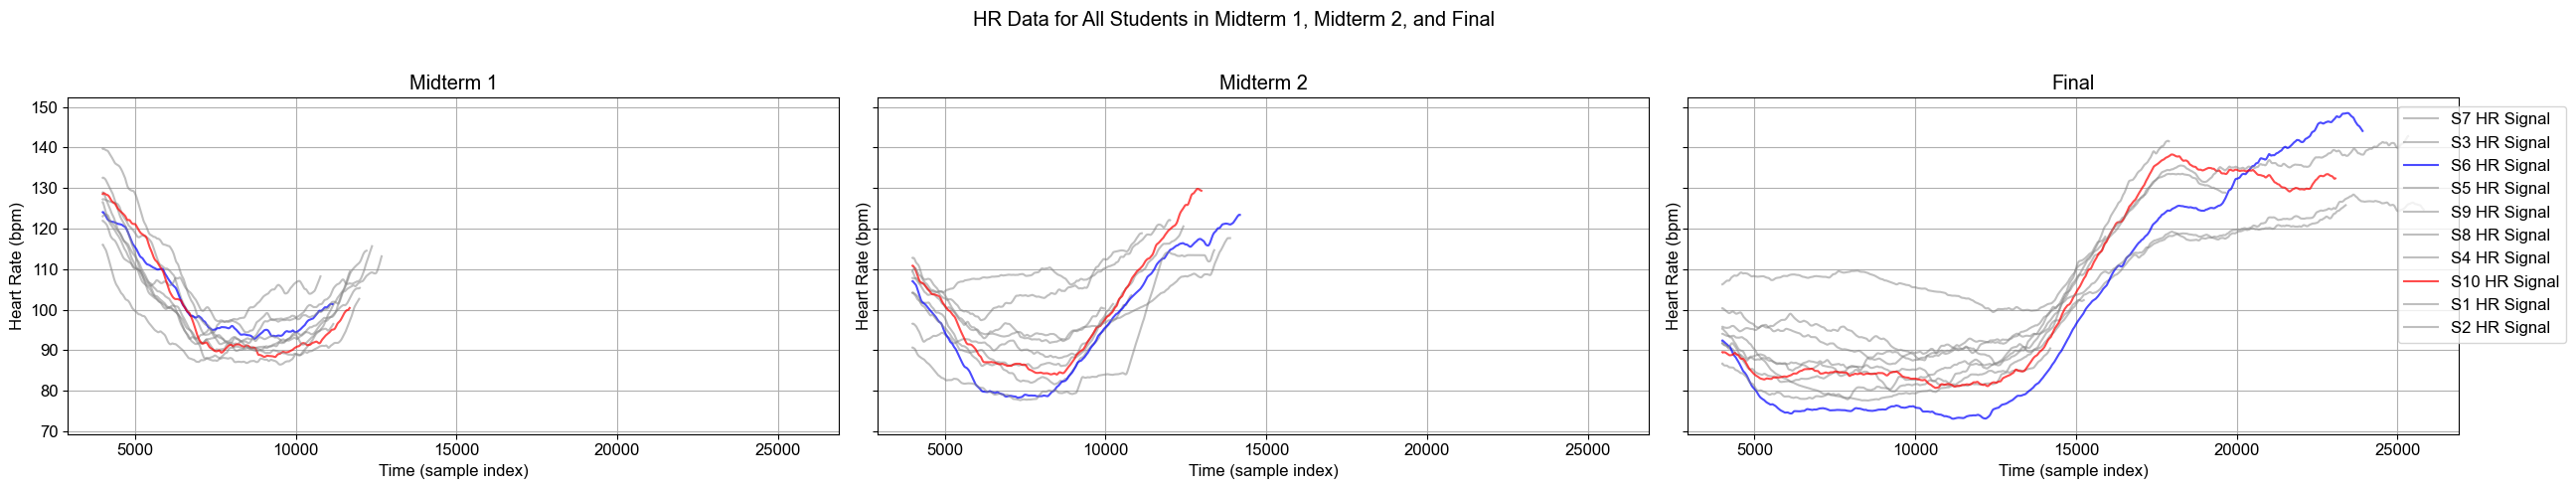

In [32]:
# find the rolling HR for Student S06 during midterm 1, midterm 2 and final

selected_students = ['S6', 'S10']
num_students = len(selected_students)
assessments = ['Midterm 1', 'Midterm 2', 'Final']
window_size = 4000

# Plot all students' rolling HR on the same plot in three separate visualizations

fig, axes = plt.subplots(1, len(assessments), figsize=(25, 5), sharex=True, sharey=True)
fig.suptitle('HR Data for All Students in Midterm 1, Midterm 2, and Final')

for col, assessment in enumerate(assessments):
    ax = axes[col]
    for student_id in all_students:
        student_info = student_data[student_id]
        assessment_data = student_info[assessment]
        smoothed_hr = assessment_data['HR.csv'].iloc[:, 0].rolling(window=window_size).mean()
        color = 'gray' if student_id not in selected_students else ('blue' if student_id == 'S6' else 'red')
        ax.plot(smoothed_hr.index, smoothed_hr, label=f"{student_id} HR Signal", color=color, alpha=0.7 if student_id in selected_students else 0.5)
    ax.set_title(f"{assessment}")
    ax.set_xlabel("Time (sample index)")
    ax.set_ylabel("Heart Rate (bpm)")
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()